###About Dataset
Electric vehicle
Electric Vehicle is a vehicle that uses one or more electric motors for propulsion. It can be powered by a collector system, with electricity from extravehicular sources, or it can be powered autonomously by a battery (sometimes charged by solar panels, or by converting fuel to electricity using fuel cells or a generator)EVs include, but are not limited to, road and rail vehicles, surface and underwater vessels, electric aircraft , and electric spacecraft. For road vehicles, together with other emerging automotive technologies such as autonomous driving, connected vehicles, and shared mobility, EVs form a future mobility vision called Connected, Autonomous, Shared, and Electric (CASE) Mobility.

###History
Electric motive power started in 1827, when Hungarian priest Ányos Jedlik built the first crude but viable electric motor, which used a stator, rotor, and commutator; and the next year he used it to power a small car.[14] In 1835, professor Sibrandus Stratingh of the University of Groningen, in the Netherlands, built a small-scale electric car, and sometime between 1832 and 1839, Robert Anderson of Scotland invented the first crude electric carriage, powered by non-rechargeable primary cells.[15] American blacksmith and inventor Thomas Davenport built a toy electric locomotive, powered by a primitive electric motor, in 1835. In 1838, a Scotsman named Robert Davidson built an electric locomotive that attained a speed of four miles per hour (6 km/h). In England a patent was granted in 1840 for the use of rails as conductors of electric current, and similar American patents were issued to Lilley and Colten in 1847.

#Column details


*   VIN (1-10)-Vehicle Identification Number of the vehicle mentioned in
     the dataset.
*   County-County Name from where the data is gathered.
*  City-Cities Name from where the data is gathered.
*  State-State Name from where the data is gathered.
*  Postal Code-The postal code from where the data is Present
*  Model Year-Manufacturing year of the model mentioned in the data set
*  Make-Manufacturer of the vehicle.
*  Model-Model Name of the mentioned vehicle.
*  Electric Vehicle Type-Type of the vehicle present in the dataset
*  Clean Alternative -Clean Alternative for the data present in this dataset.

*  Electric Range: The maximum distance the vehicle can travel on electric
  power alone
*  Base MSRP: The manufacturer's suggested retail price for the vehicle model.
*  Legislative District: The legislative district where the vehicle is registered.
*  DOL Vehicle ID: Unique identifier assigned by the Department of Licensing (DOL) for the vehicle.
*  Vehicle Location: The specific location of the vehicle.
*  Electric Utility: The electric utility company associated with the vehicle, if applicable.


*  2020 Census Tract: The census tract code for the vehicle's location, based on the 2020 census data.









In [46]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim


#od.download('https://www.kaggle.com/datasets/rajkumarpandey02/electric-vehicle-population-data')
#{"username":"kalehariprasad","key":"06963035cd86cf603565ce00b3dc51f8"}

In [47]:
df=pd.read_csv('electric-vehicle-population-data/Electric_Vehicle_Population_Data.csv')

In [48]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


displaying all rows

In [49]:
pd.set_option('display.max_rows', None)

In [50]:
df.shape

(135038, 17)

In [51]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

In [53]:
df.columns[df.isnull().sum() > 0]

Index(['County', 'City', 'Postal Code', 'Model', 'Electric Range', 'Base MSRP',
       'Legislative District', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract'],
      dtype='object')

In [54]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [55]:
df=df.dropna()

In [56]:


df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [57]:
df.shape

(134474, 17)

In [59]:
df.drop(['VIN (1-10)','DOL Vehicle ID'],axis=1)

<Axes: xlabel='Model Year', ylabel='Count'>

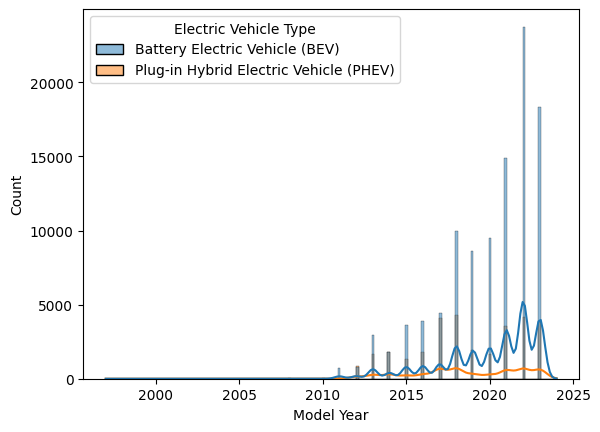

In [60]:
sns.histplot(data=df,x="Model Year",kde=True,hue='Electric Vehicle Type')

over the years battery electric vehicle has increased more as compared to plug-inHybrid electric vehile

C:\Users\Christopher\AppData\Local\Temp\ipykernel_4584\802323430.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Model Year'])


<Axes: ylabel='Density'>

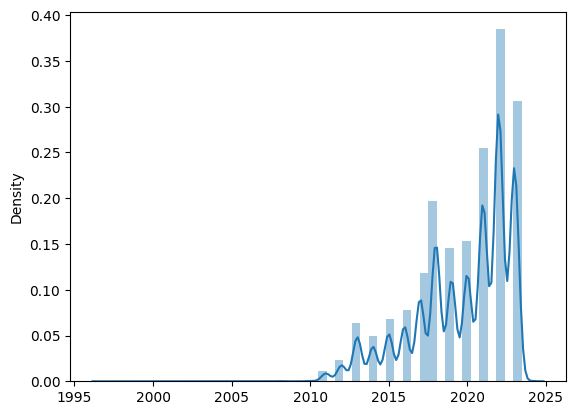

In [61]:
sns.distplot(x=df['Model Year'])

Electric vehicle production and useage has been increased from 2015 onwords

In [62]:
df['County'].unique()

array(['Thurston', 'Island', 'Snohomish', 'King', 'Chelan', 'Kitsap',
       'Yakima', 'Whitman', 'Skagit', 'Pend Oreille', 'Pierce', 'Douglas',
       'Grant', 'Columbia', 'Spokane', 'Clark', 'San Juan', 'Whatcom',
       'Clallam', 'Cowlitz', 'Lewis', 'Benton', 'Walla Walla',
       'Jefferson', 'Kittitas', 'Okanogan', 'Mason', 'Stevens',
       'Garfield', 'Skamania', 'Franklin', 'Grays Harbor', 'Klickitat',
       'Adams', 'Pacific', 'Wahkiakum', 'Ferry', 'Asotin', 'Lincoln'],
      dtype=object)

In [63]:
make_name=df['Make'].value_counts().index
make_count=df['Make'].value_counts().values

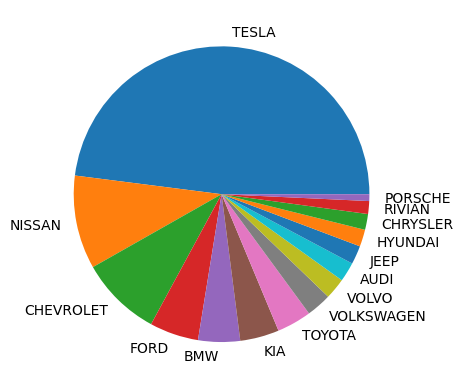

In [64]:
plt.pie(x=make_count[:15],labels=make_name[:15])
plt.show()

In [65]:
pd.crosstab(df['Make'],df['Electric Vehicle Type'])

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Make,,
AUDI,1421,1299
AZURE DYNAMICS,8,0
BENTLEY,0,3
BMW,1443,4438
CADILLAC,25,94
CHEVROLET,6549,4868
CHRYSLER,0,2222
FIAT,807,0
FISKER,0,15


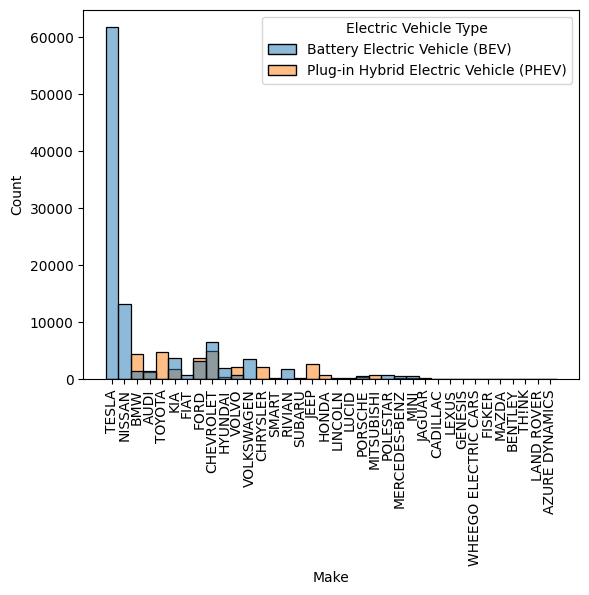

In [66]:
sns.histplot(data=df,x='Make',hue='Electric Vehicle Type')
plt.xticks(rotation='vertical')
plt.show()

Tesla is in first place in producing battery electric vehicle followed by NISSAN





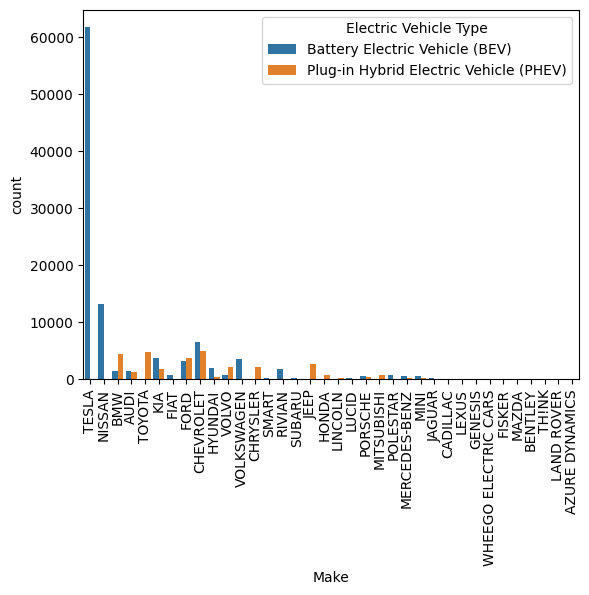

<Figure size 1000x1500 with 0 Axes>

In [67]:

sns.countplot(x=df['Make'],hue=df['Electric Vehicle Type'])
plt.xticks(rotation='vertical')
plt.figure(figsize=(10,15))
plt.show()

TESLA an NISSAN are prducing battery eklectric vehice(BEV) that too in huge ammount compared to aLL other makers

In [68]:
make_unique=df['Make'].unique()

In [69]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


<Axes: xlabel='Model', ylabel='count'>

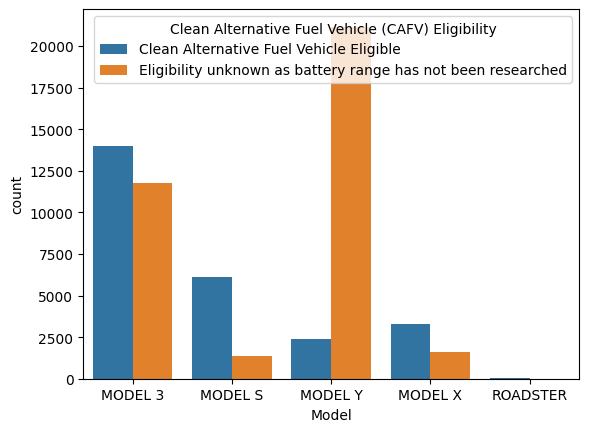

In [70]:
sns.countplot(data=df[df['Make']=='TESLA'],x='Model',hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility')

<Axes: xlabel='Model', ylabel='count'>

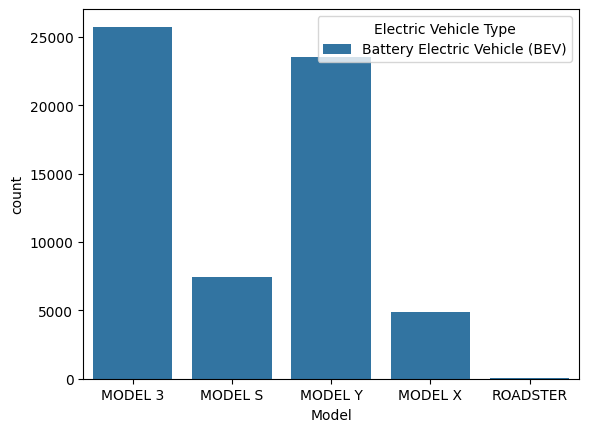

In [71]:
sns.countplot(data=df[df['Make']=='TESLA'],x='Model',hue='Electric Vehicle Type')

TESLA is producing only battery electric vehicle (BEV) type

and model3, model x modelsmore compared to other models

<Axes: xlabel='Model', ylabel='count'>

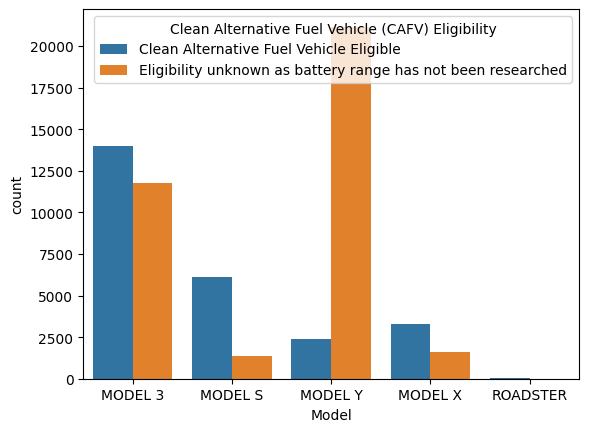

In [72]:
sns.countplot(data=df[df['Make']=='TESLA'],x='Model',hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility')

<Axes: xlabel='Model', ylabel='Count'>

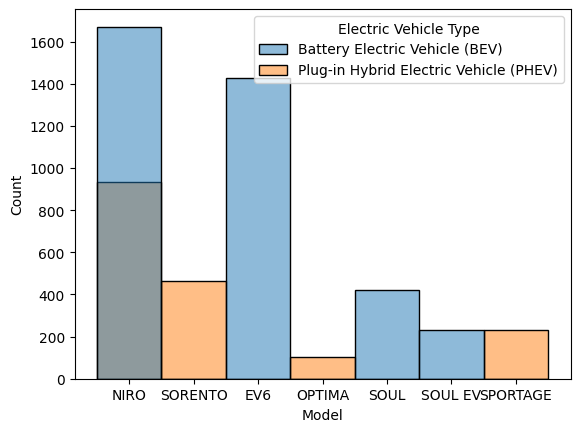

In [73]:
sns.histplot(data=df[df['Make']=='KIA'],x='Model',hue='Electric Vehicle Type')

<Axes: xlabel='Model', ylabel='count'>

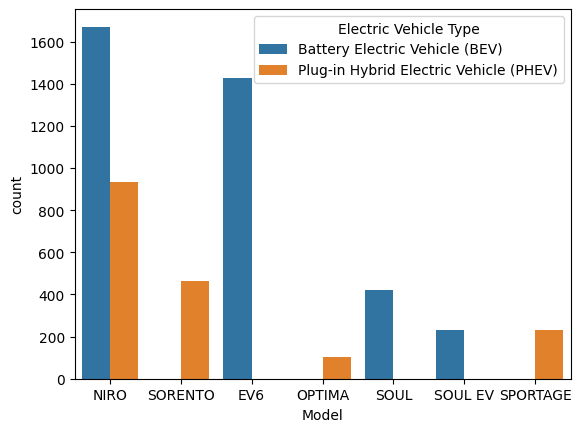

In [74]:
sns.countplot(data=df[df['Make']=='KIA'],x='Model',hue='Electric Vehicle Type')

in KIA only NIRO model have two vehicle types

battery electric vehicle (BEV)

plug -in hybrid electric vehicle (PHEV)

> in NIRO model battery electric vehicles are more compared to plug -in hybrid electric vehicle (PHEV)



remaing all models either having battery electric vehicle (BEV) or having plug -in hybrid electric vehicle (PHEV)

<Axes: xlabel='Model', ylabel='count'>

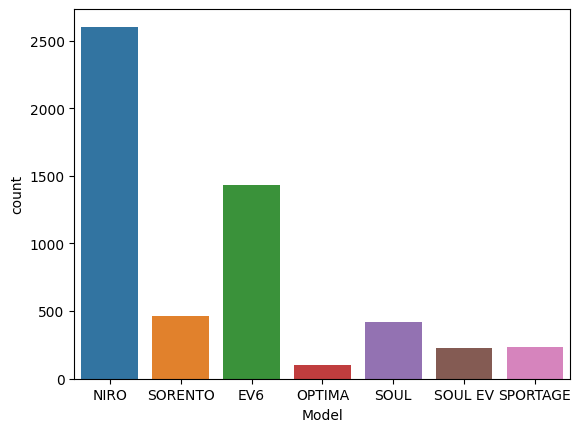

In [75]:
sns.countplot(data=df[df['Make']=='KIA'],x='Model')

KIA produced NIRO model more compared to other models

<Axes: xlabel='Model', ylabel='count'>

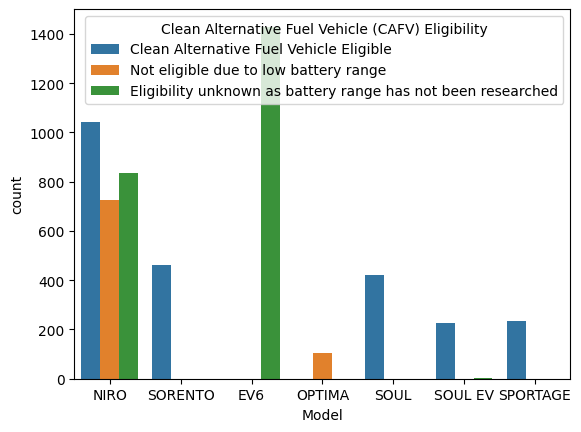

In [76]:
sns.countplot(data=df[df['Make']=='KIA'],x='Model',hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility')

in KIA  make NIRO model has all three kinds of 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'

*   Clean Alternative Fuel Vehicle (CAFV) Eligible
*   Not eligible due to low battery range
*   Eligibility unkwon due to batteru range has not been reaserched


> EV6  MOdel

*  has high numbers of vehicles(approx 1400 above) that are comes under Eligibility unkwon due to batteru range has not been reaserched

> Remaining models
* Reamaining all models are comes under  Clean Alternative Fuel Vehicle (CAFV) Eligible







<Axes: xlabel='Model', ylabel='count'>

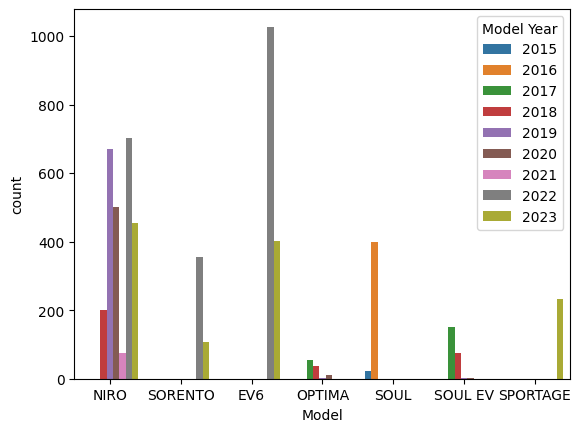

In [77]:
sns.countplot(data=df[df['Make']=='KIA'],x='Model',hue='Model Year')

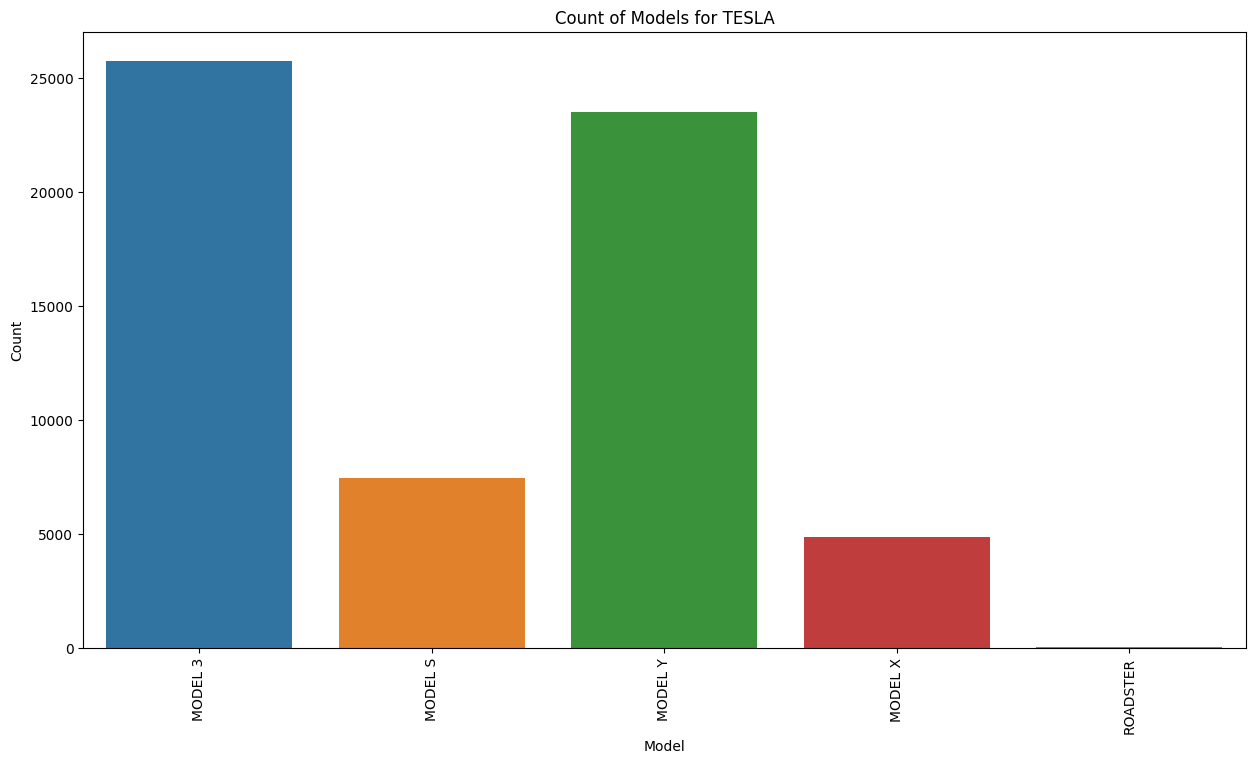

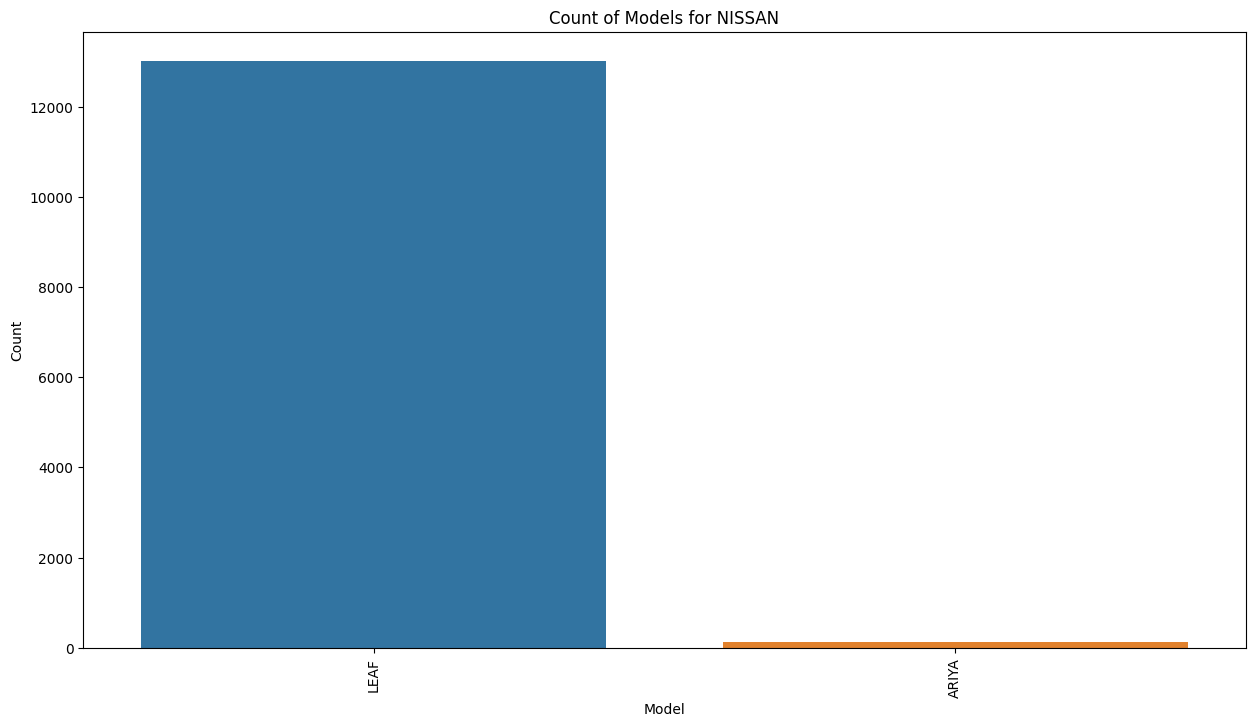

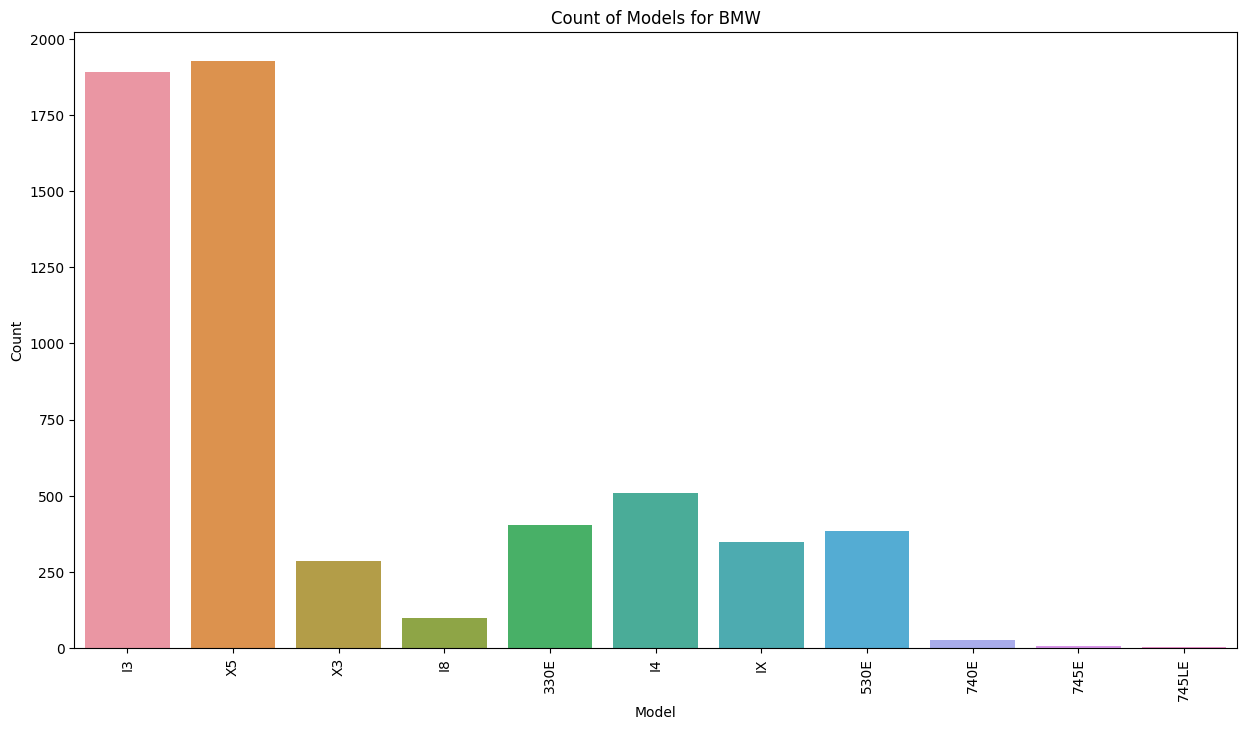

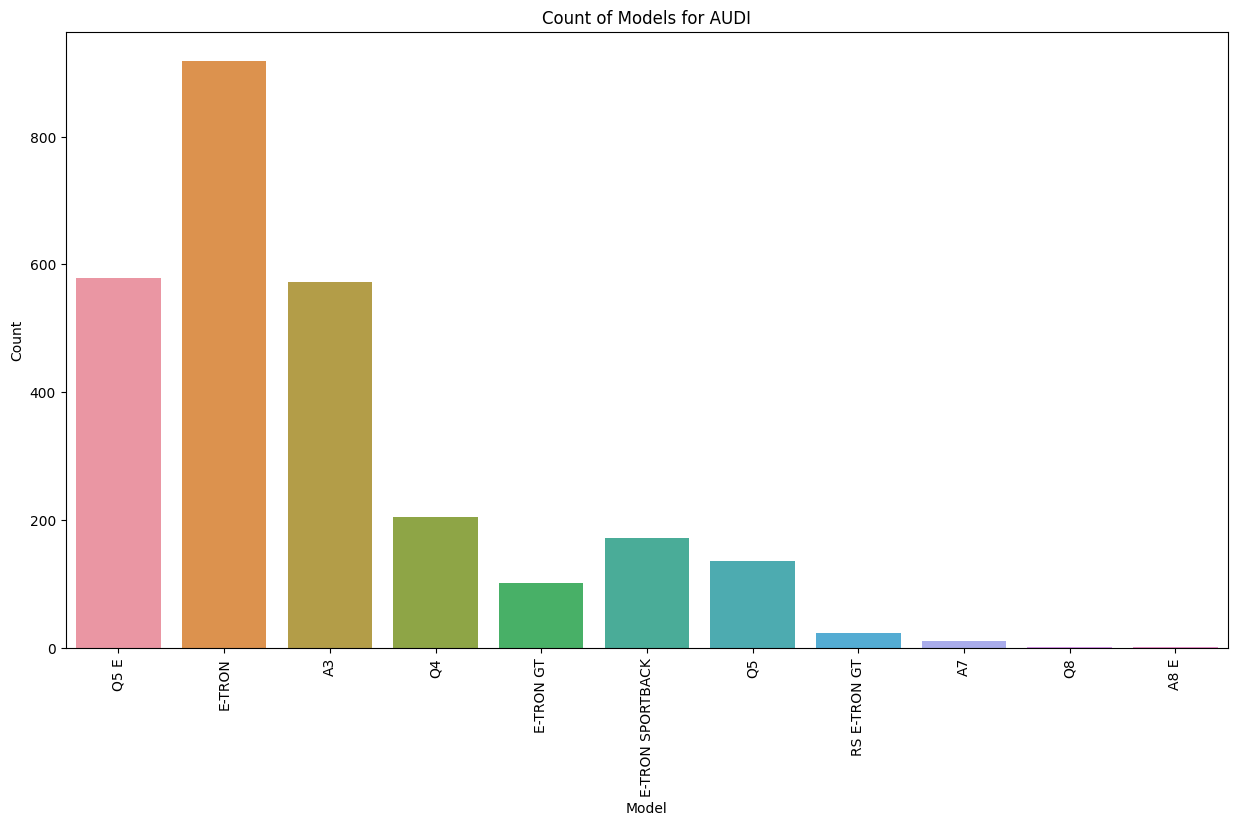

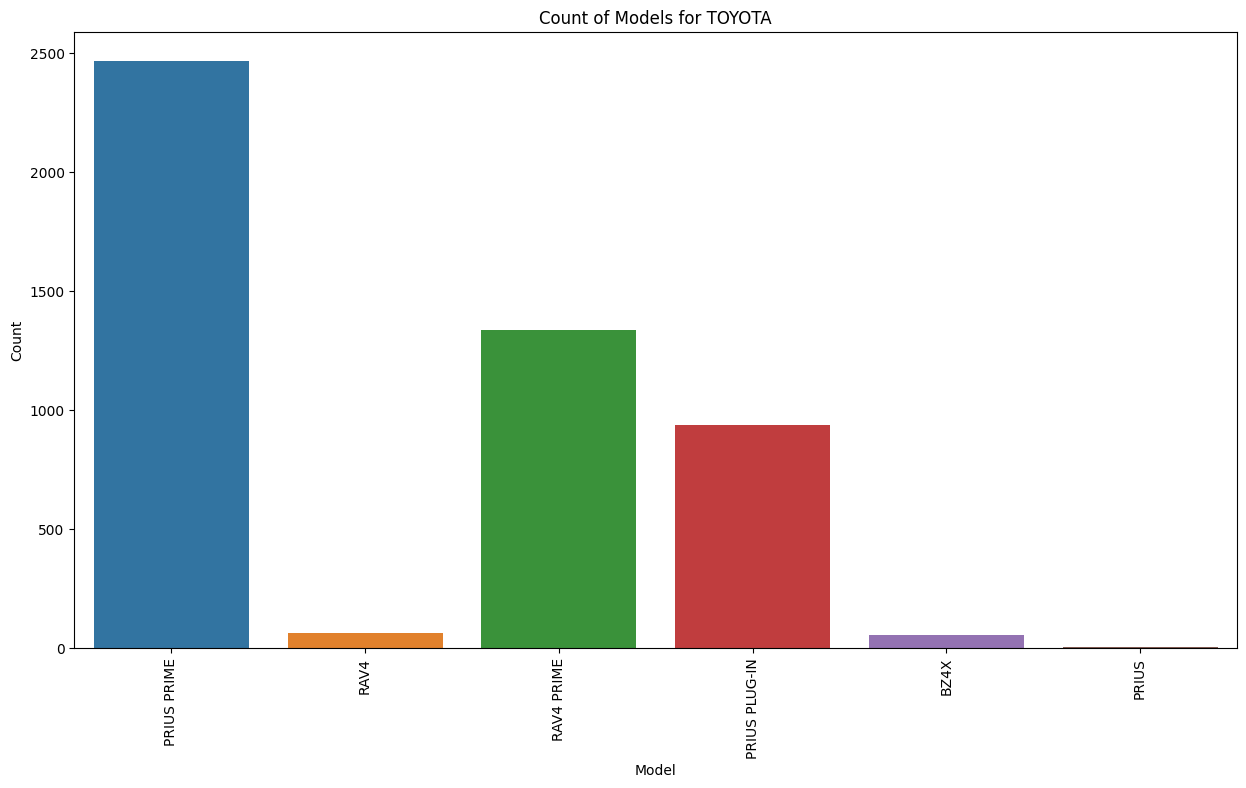

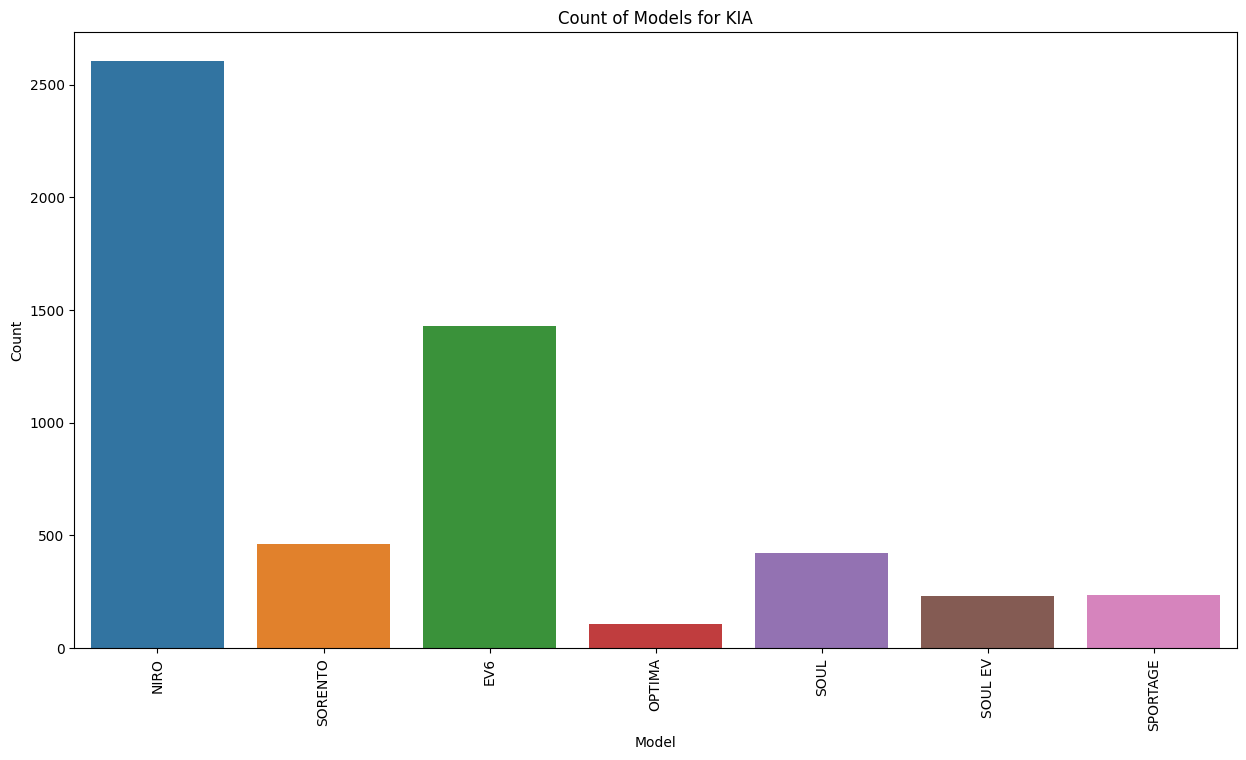

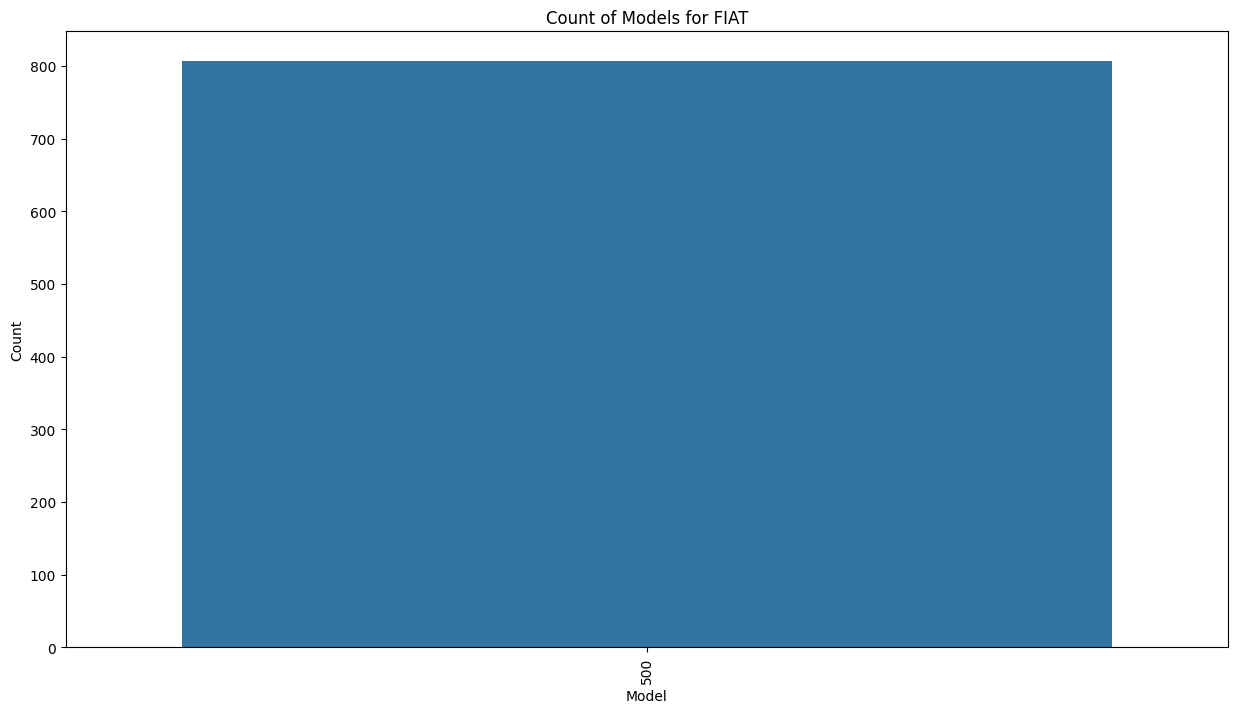

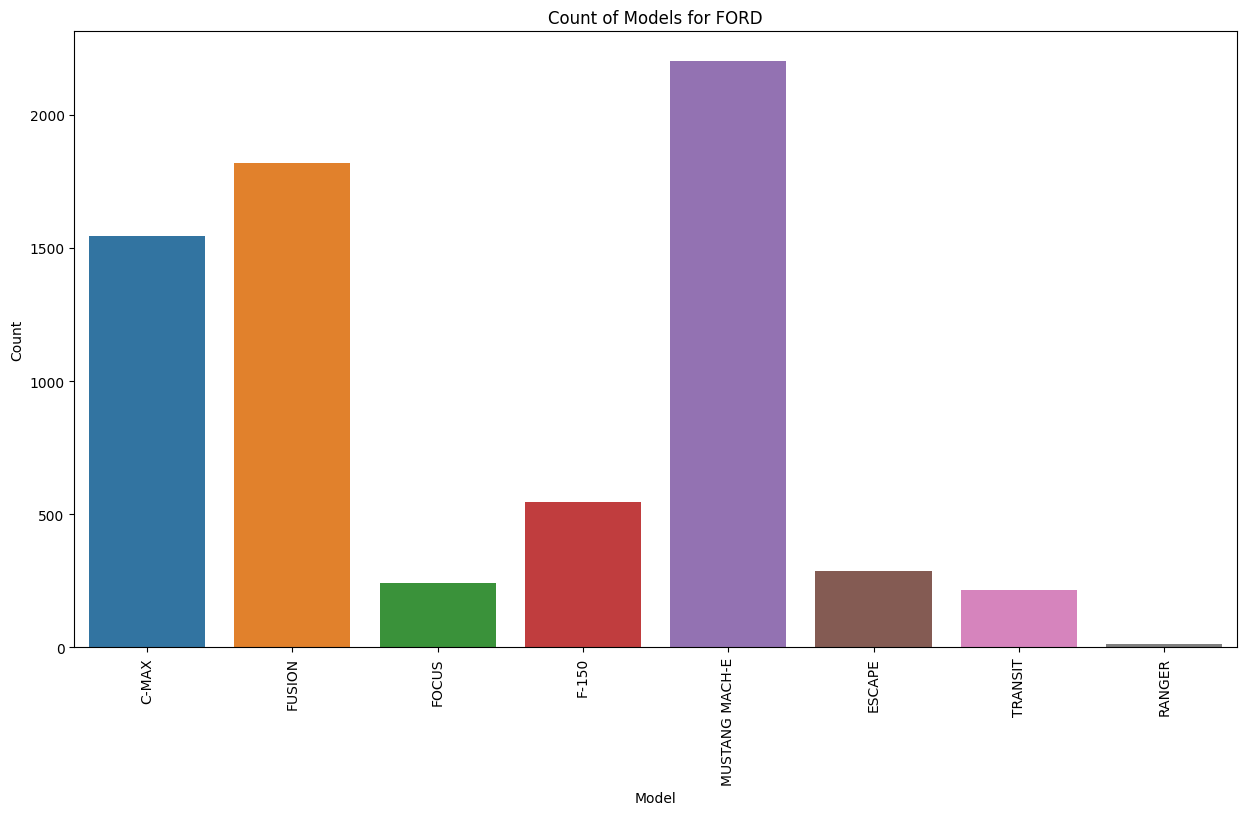

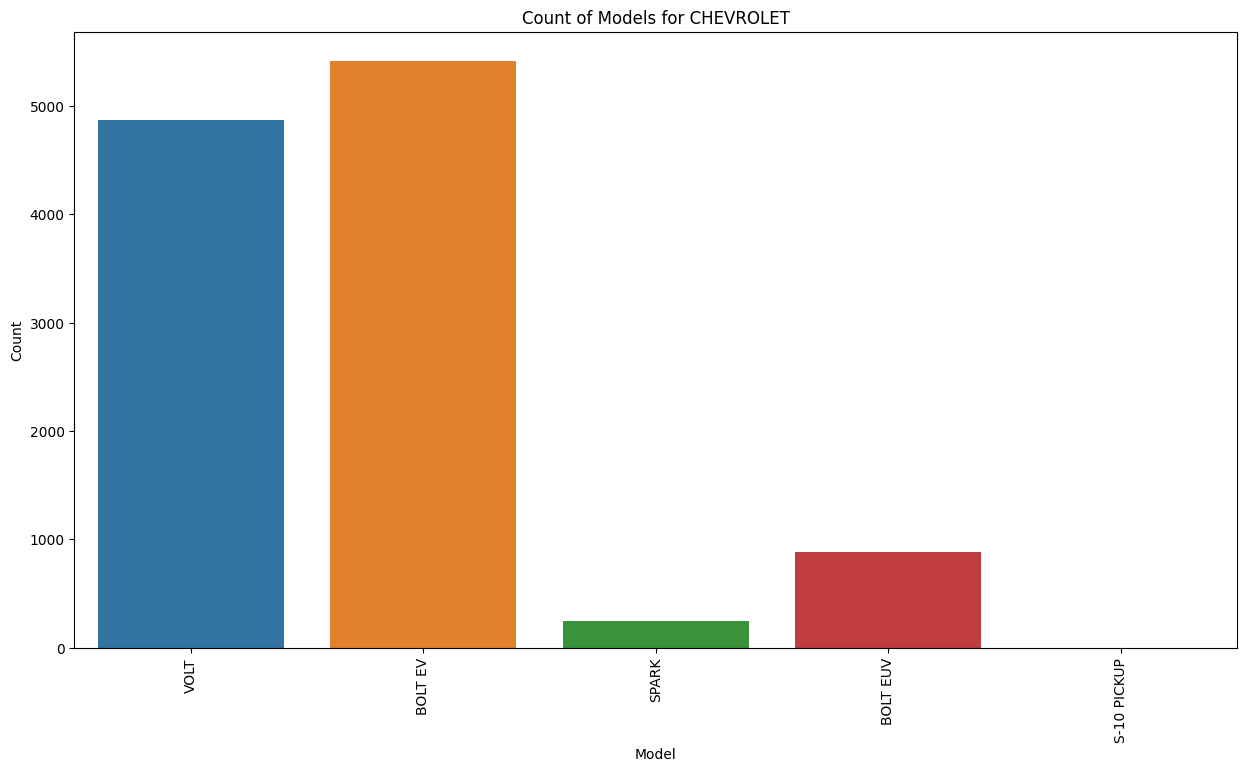

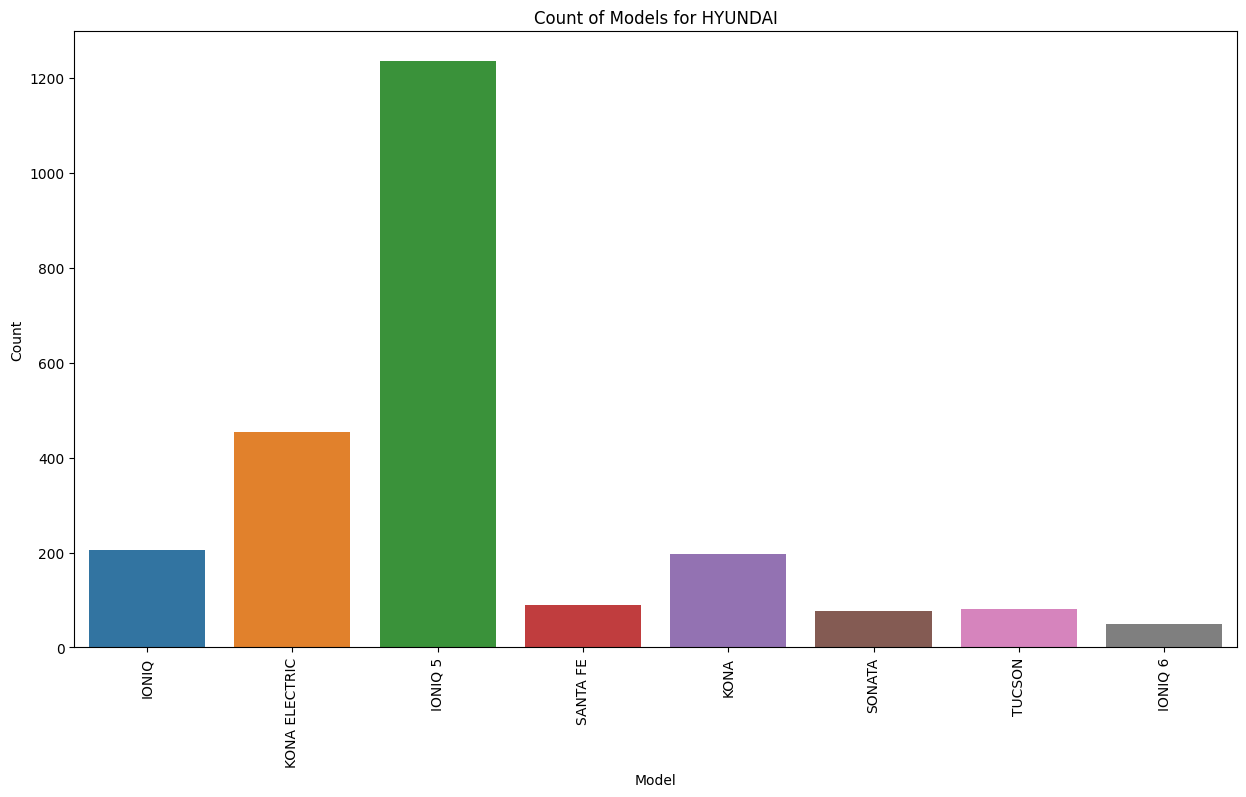

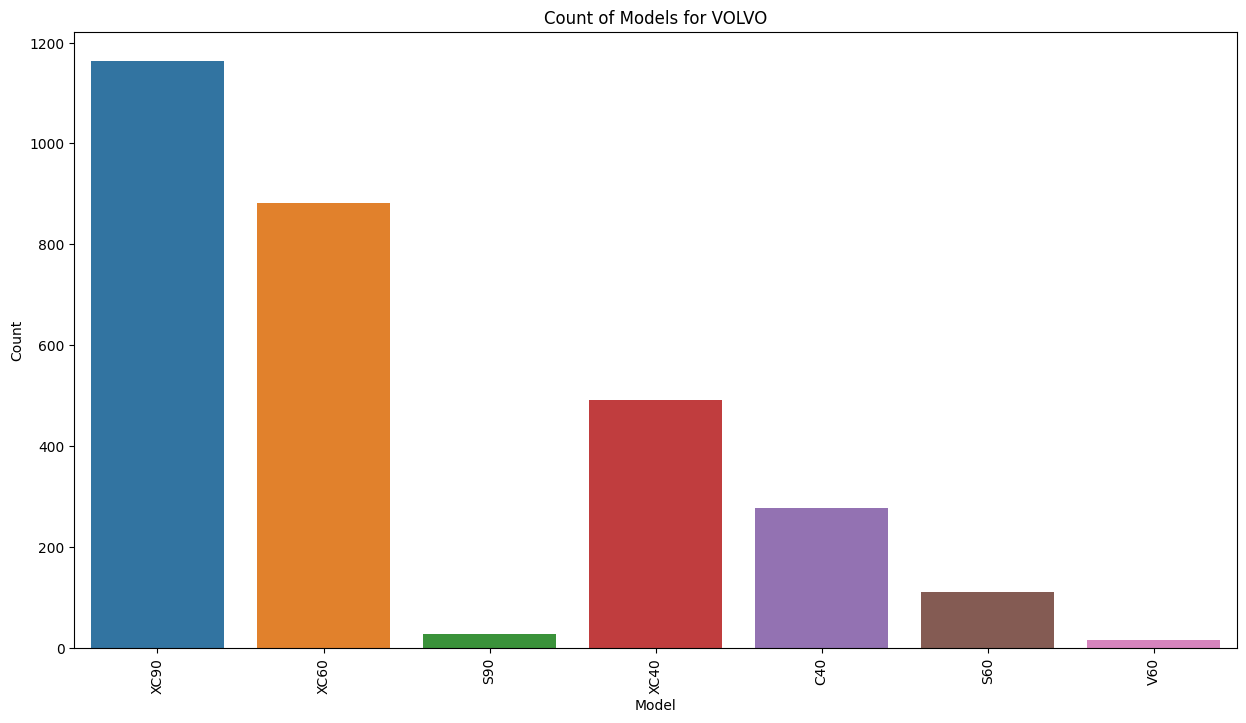

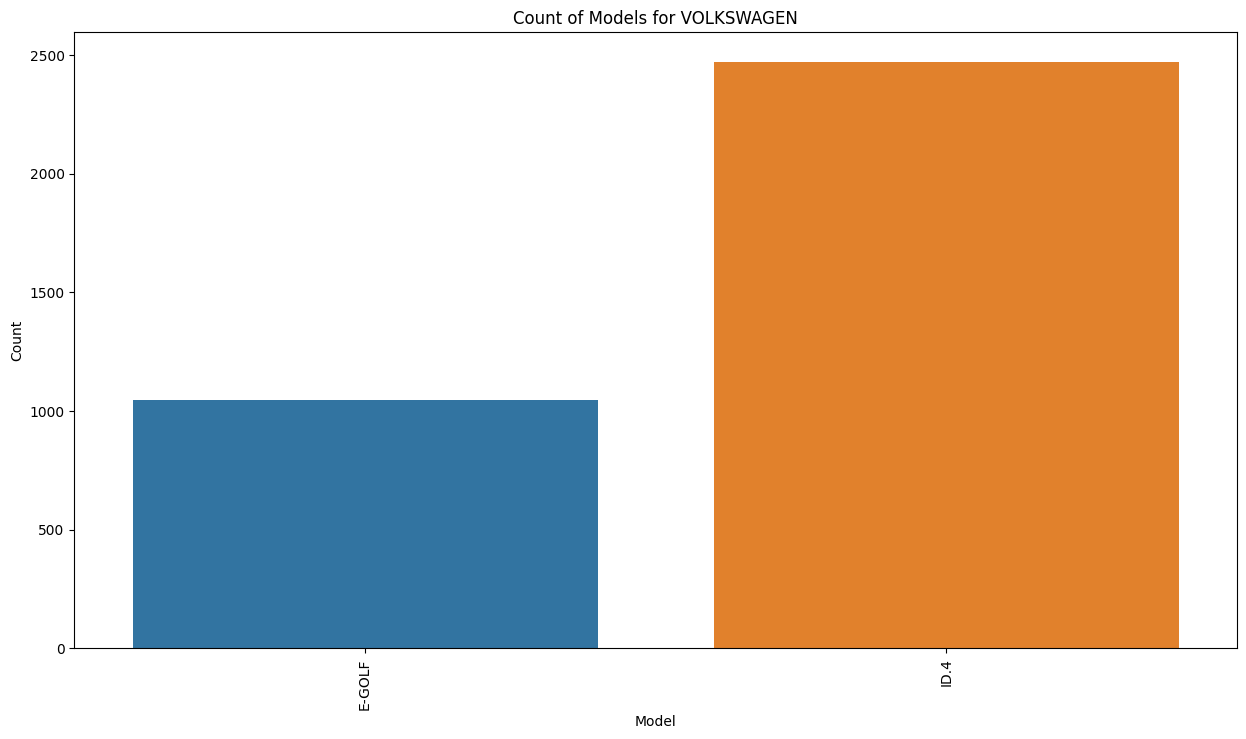

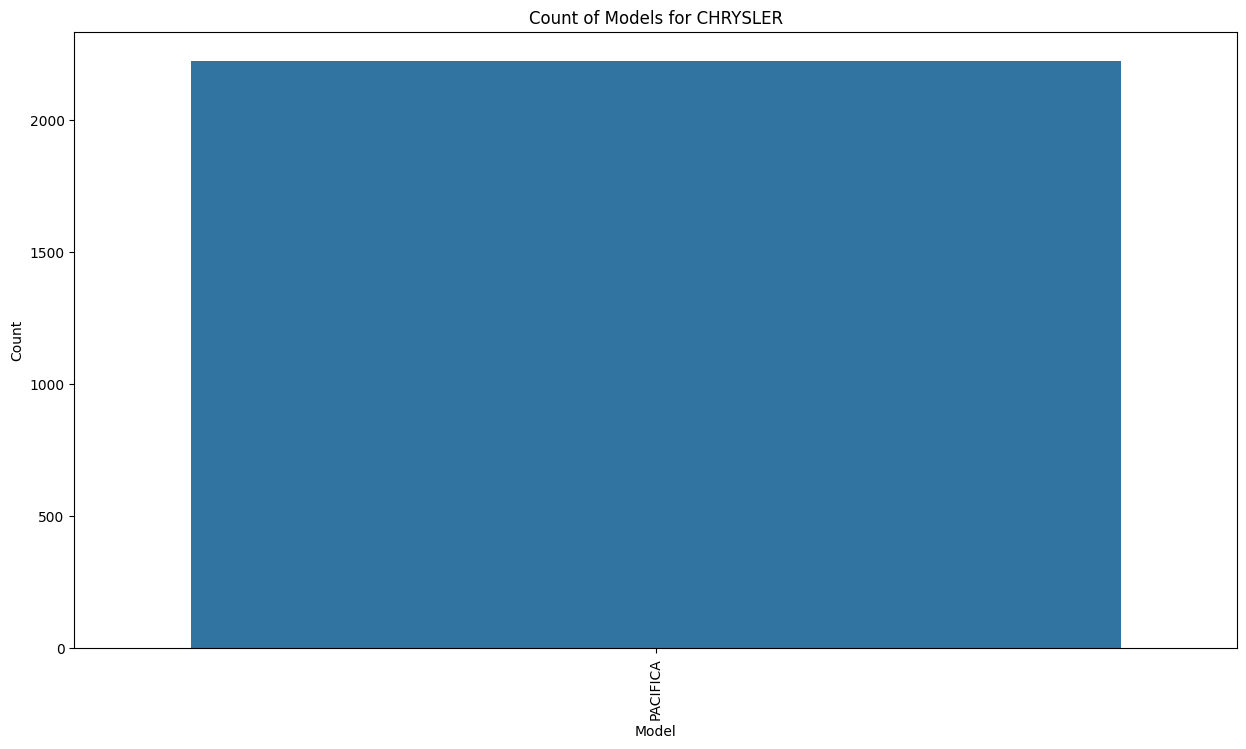

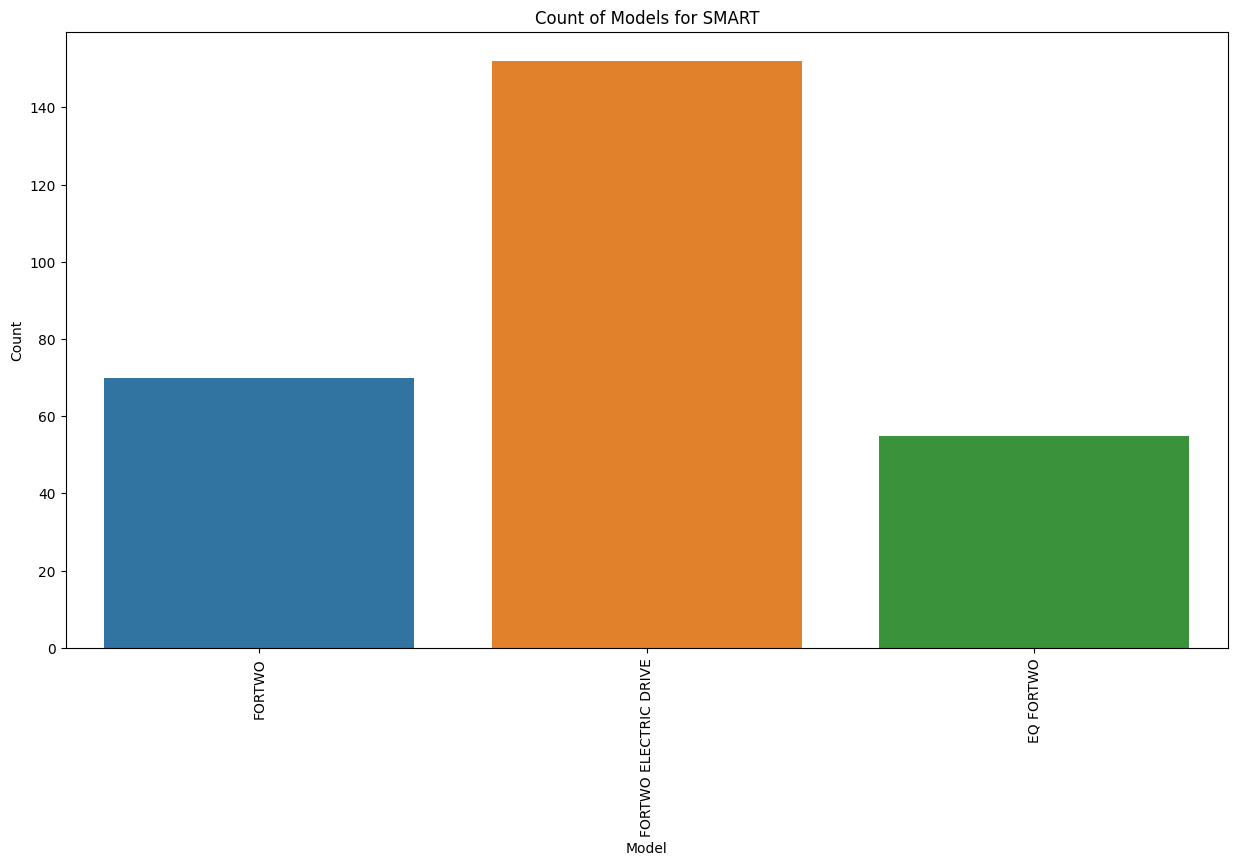

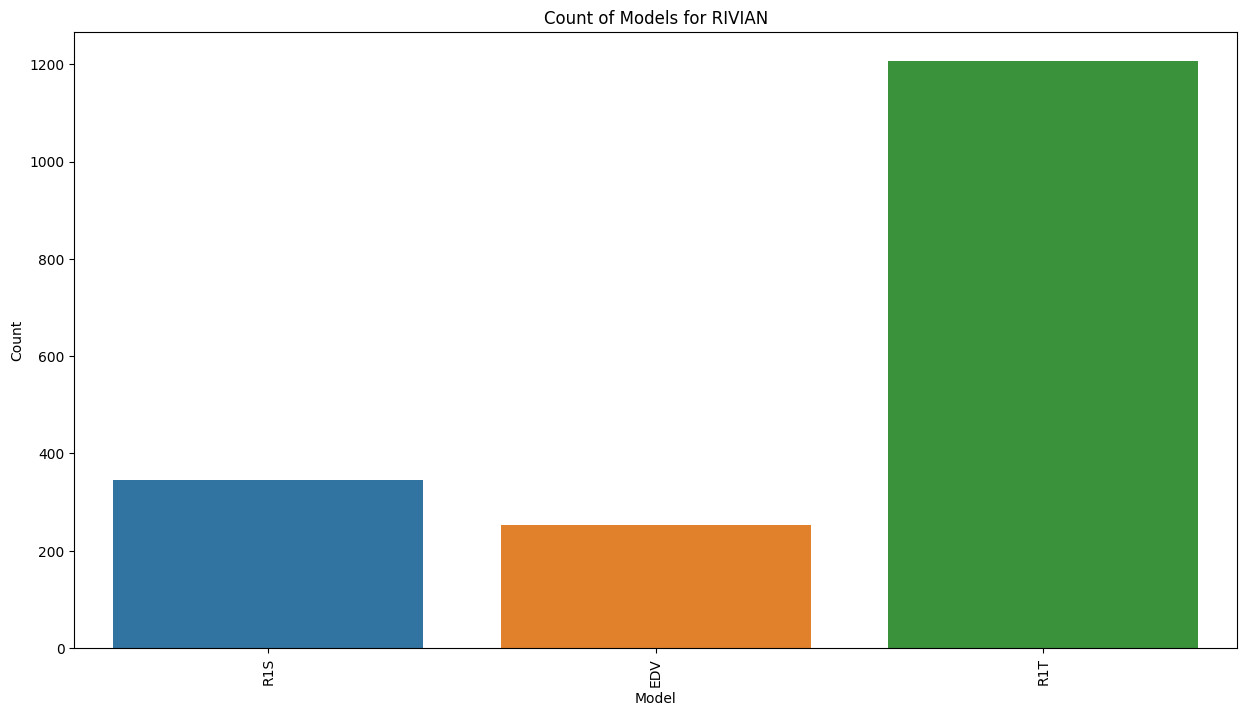

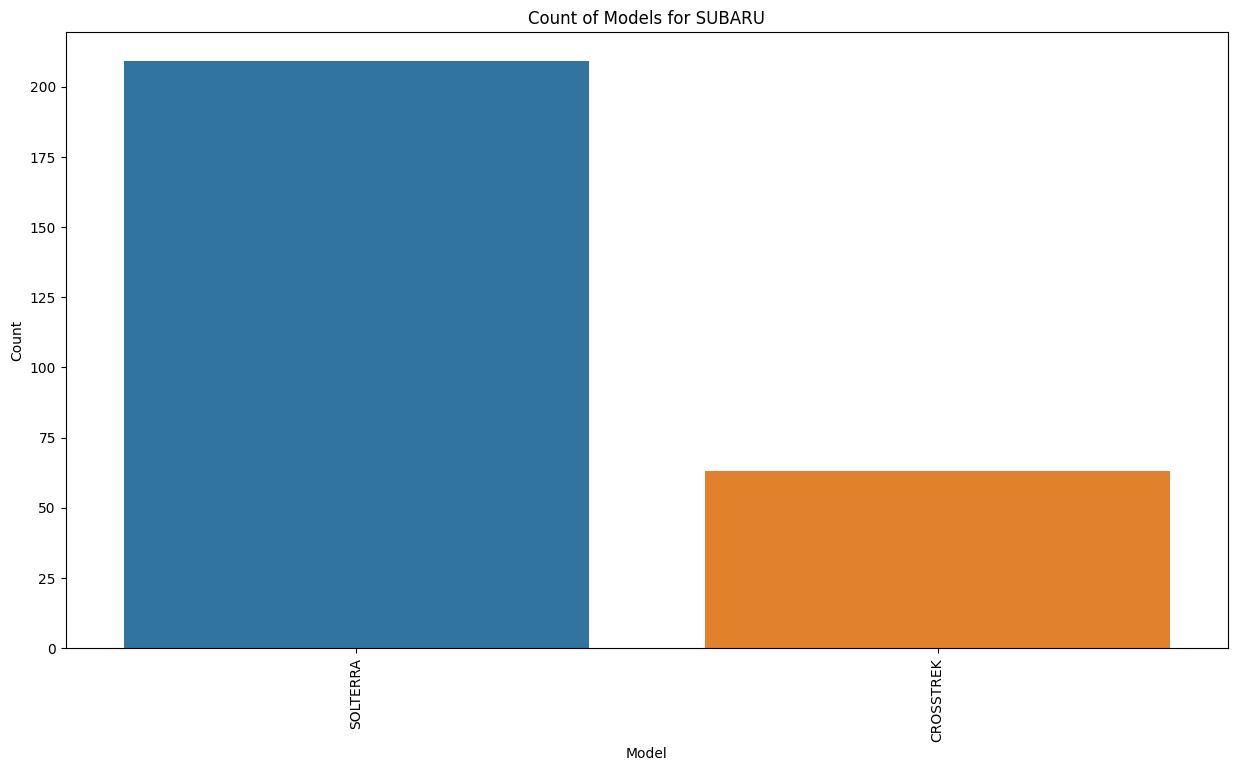

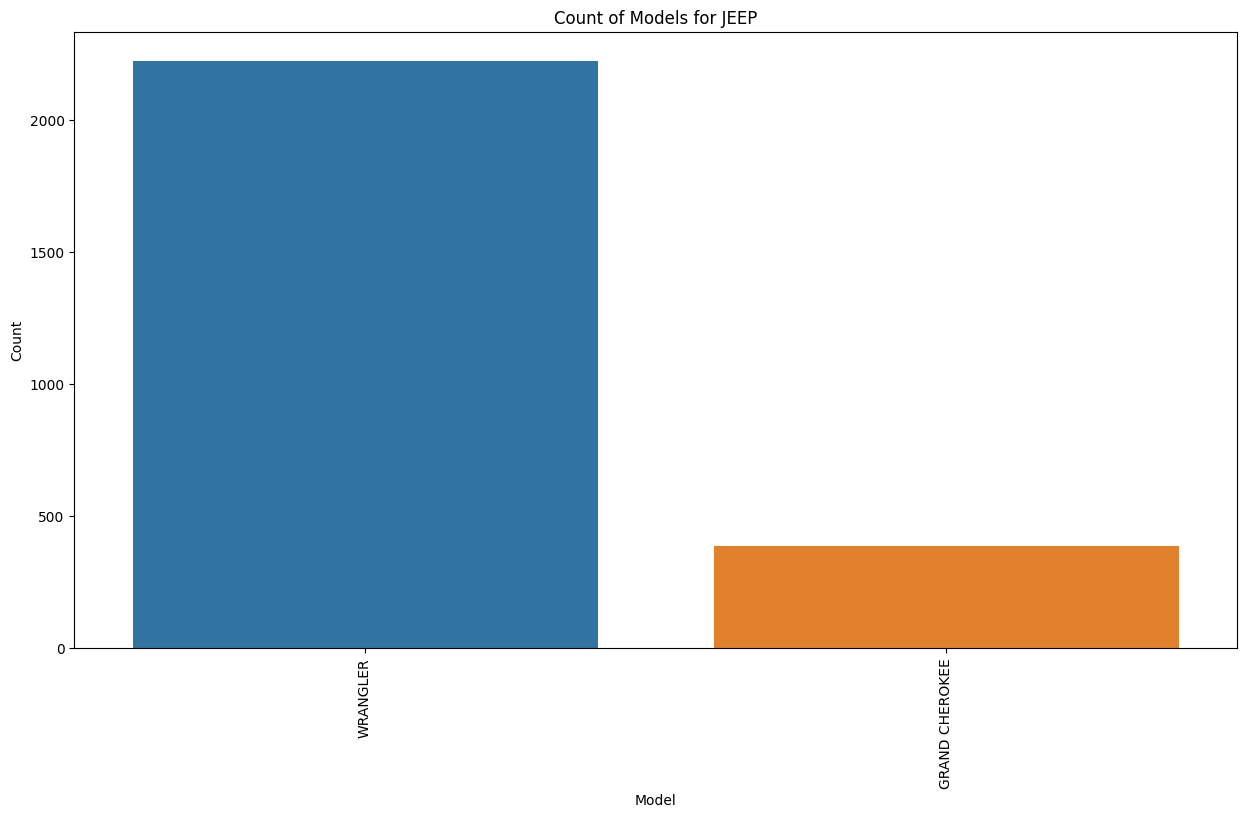

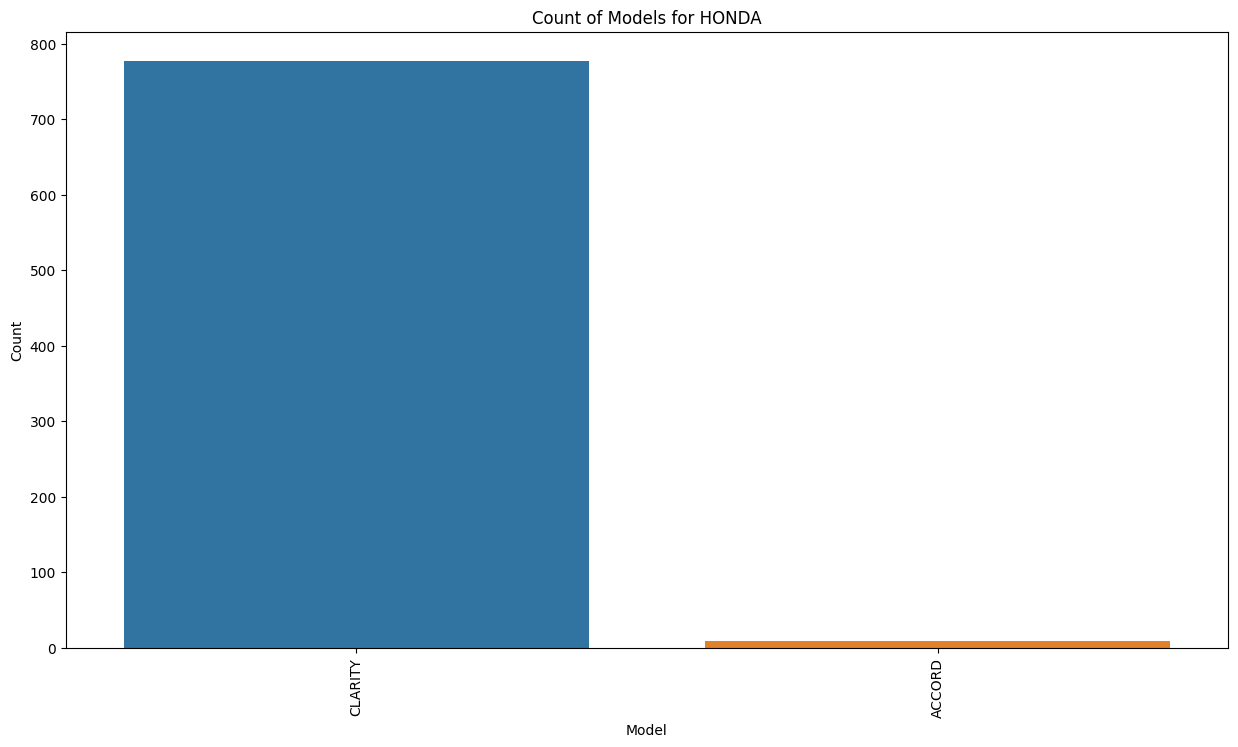

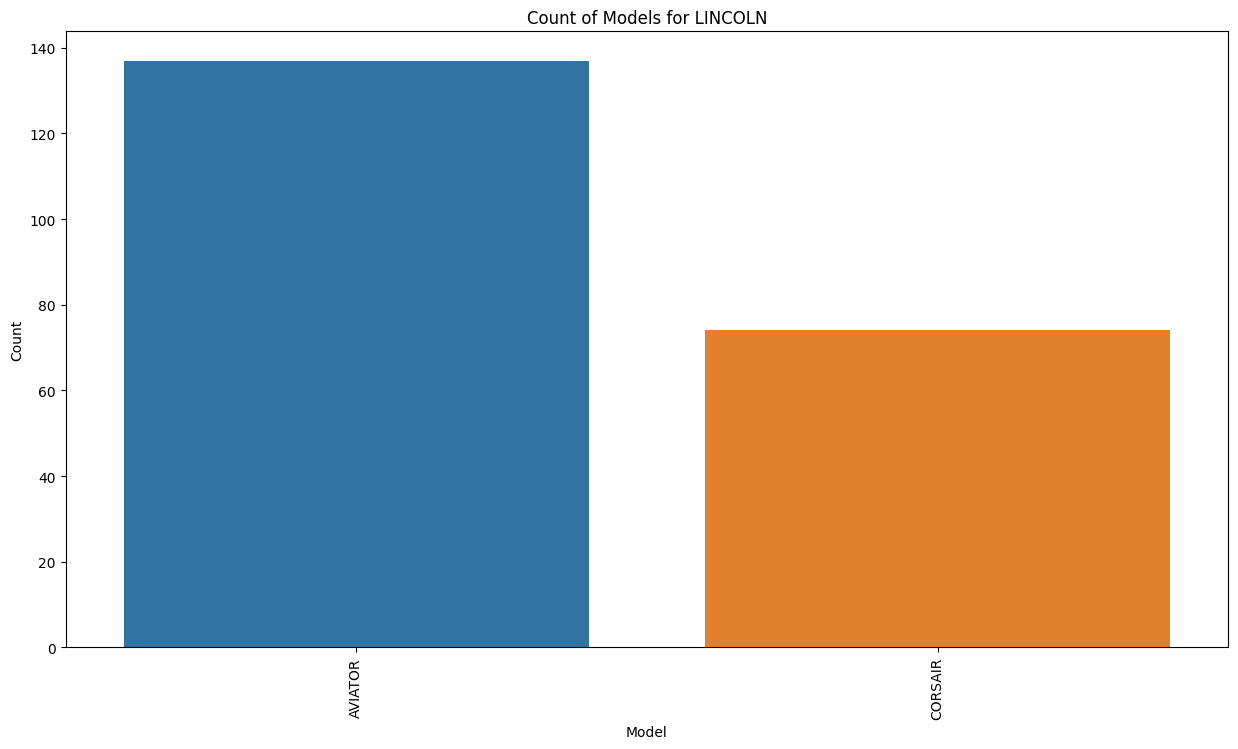

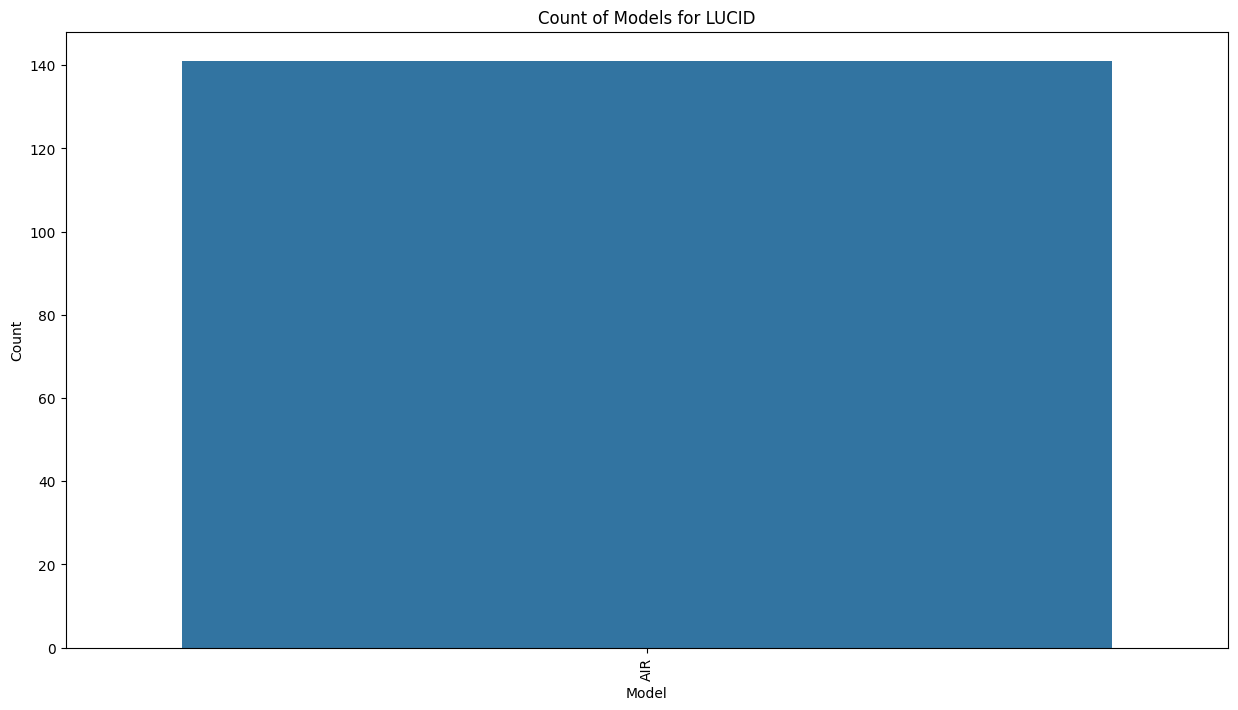

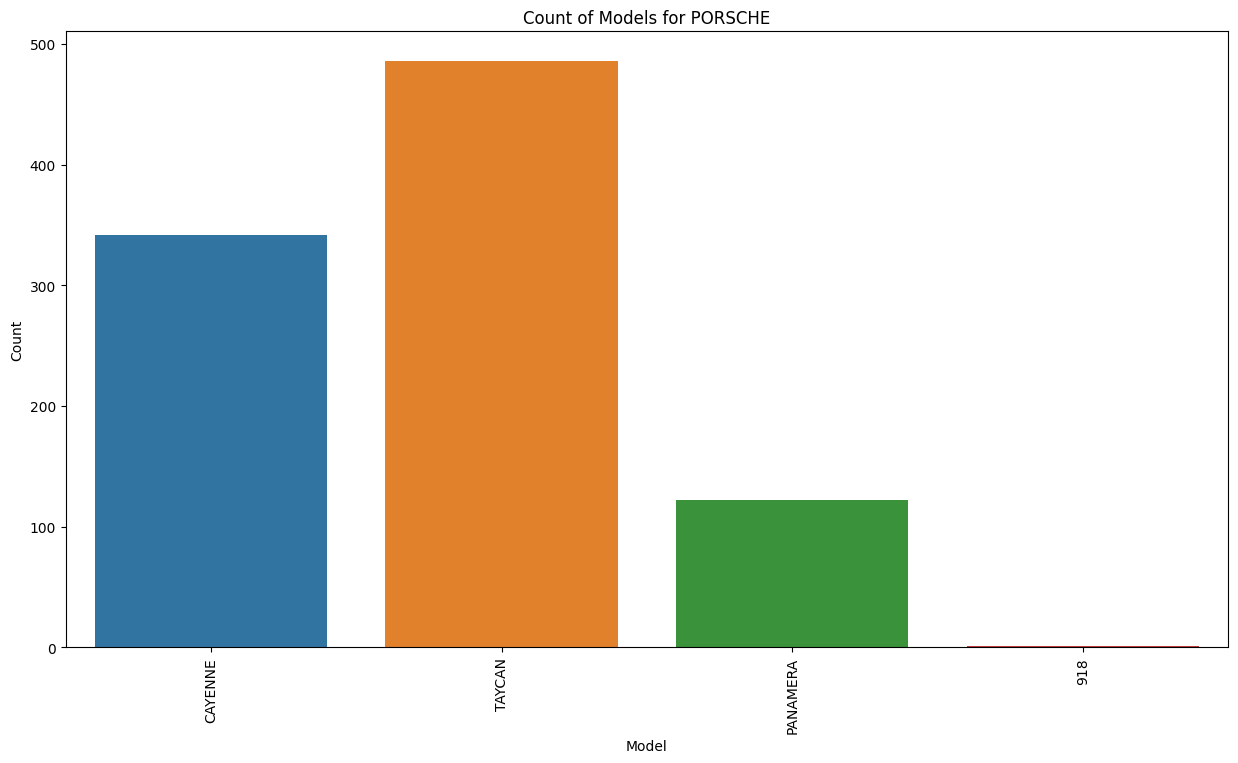

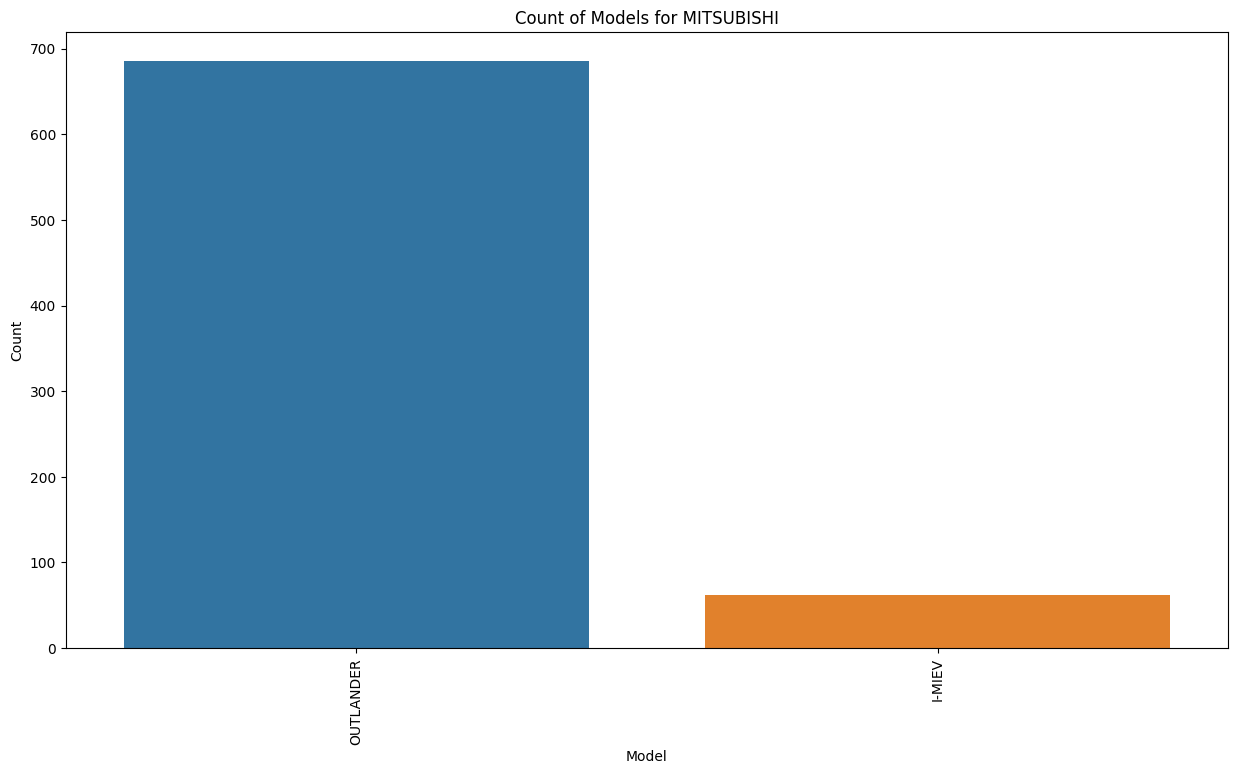

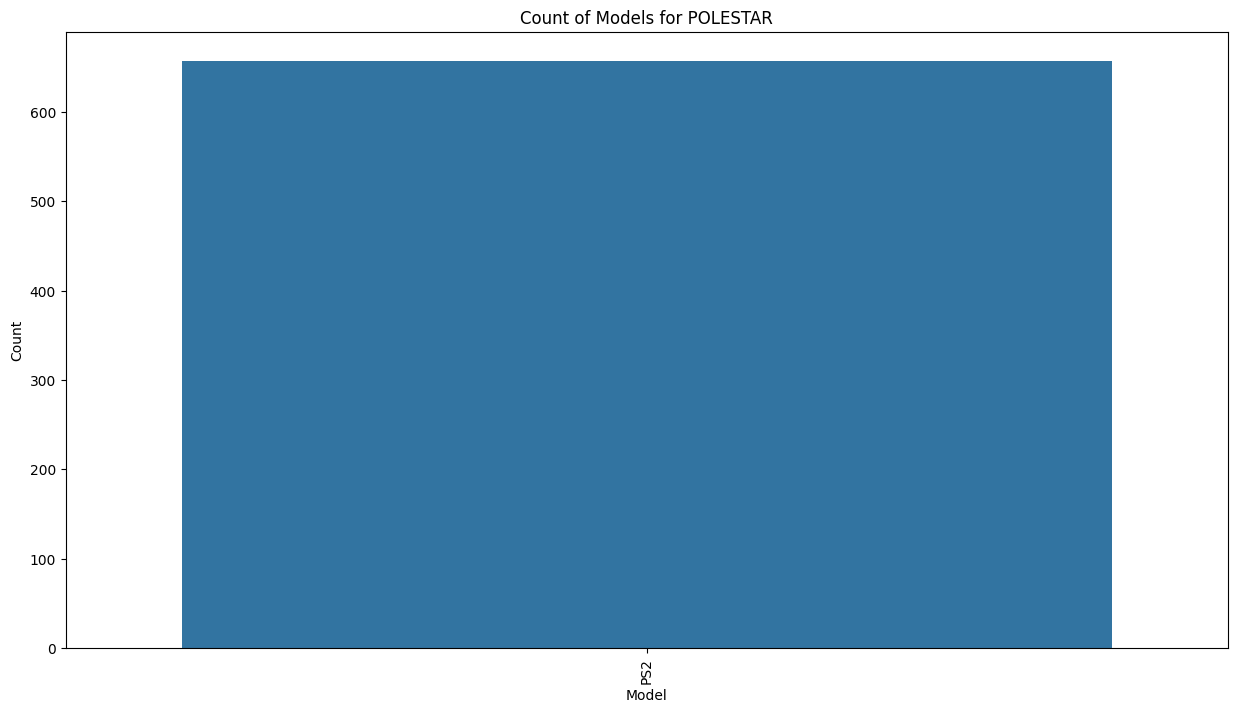

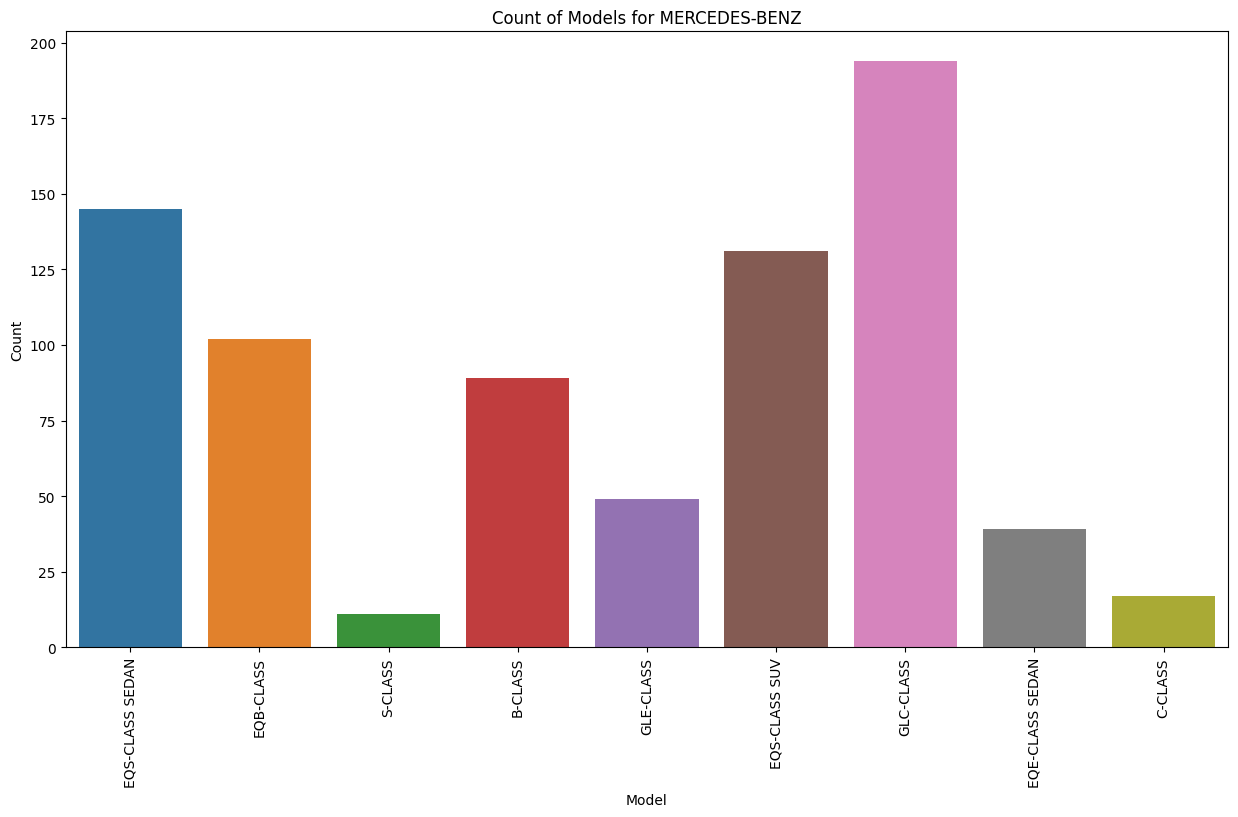

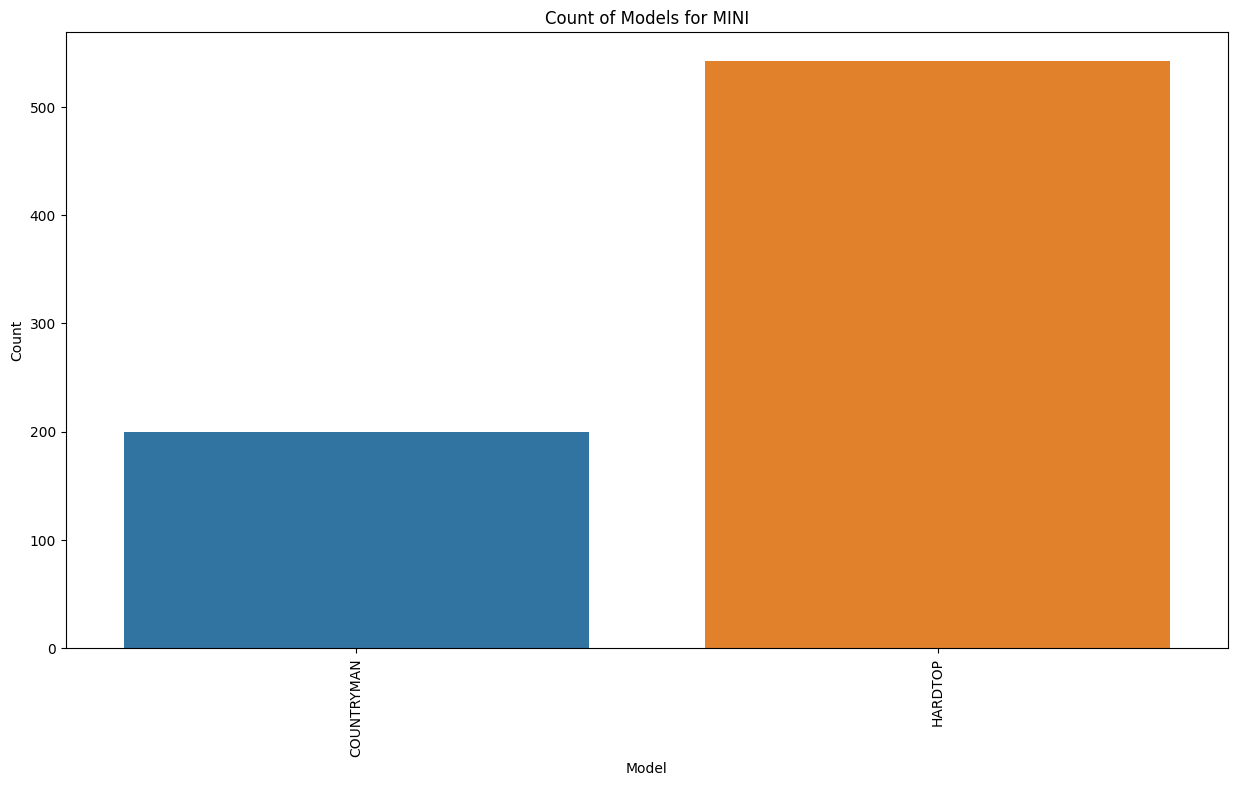

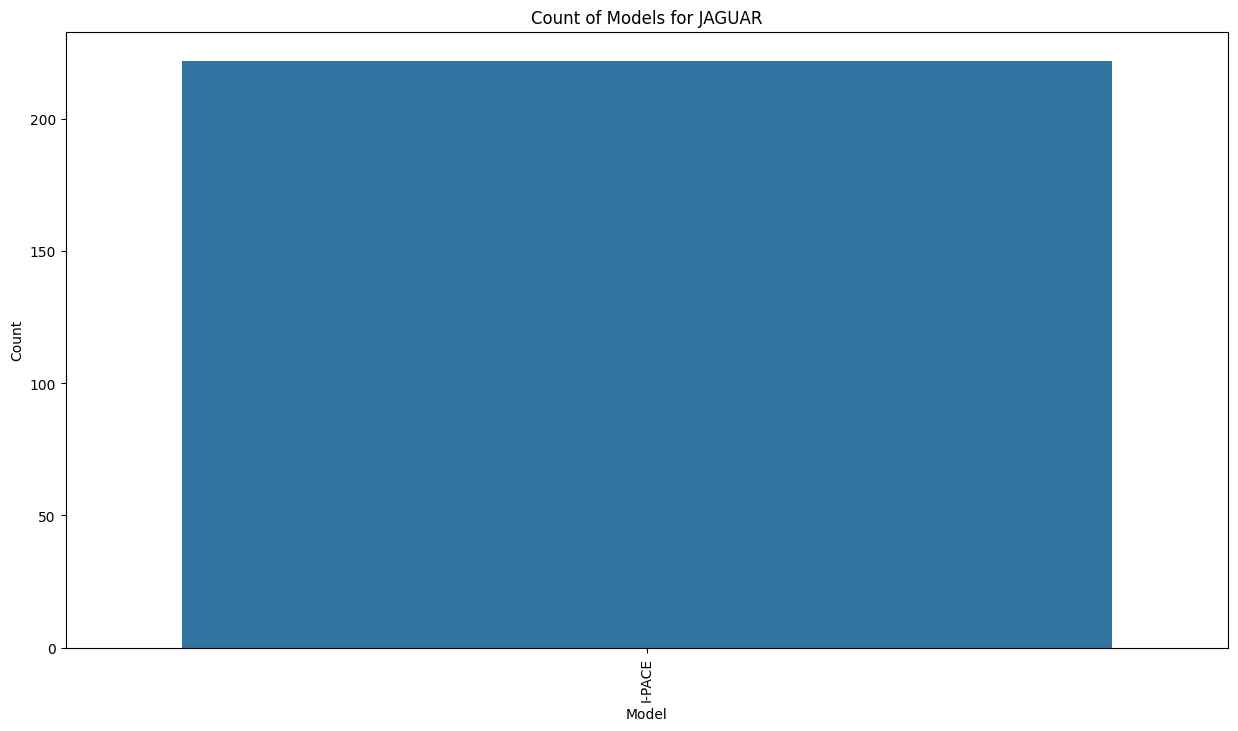

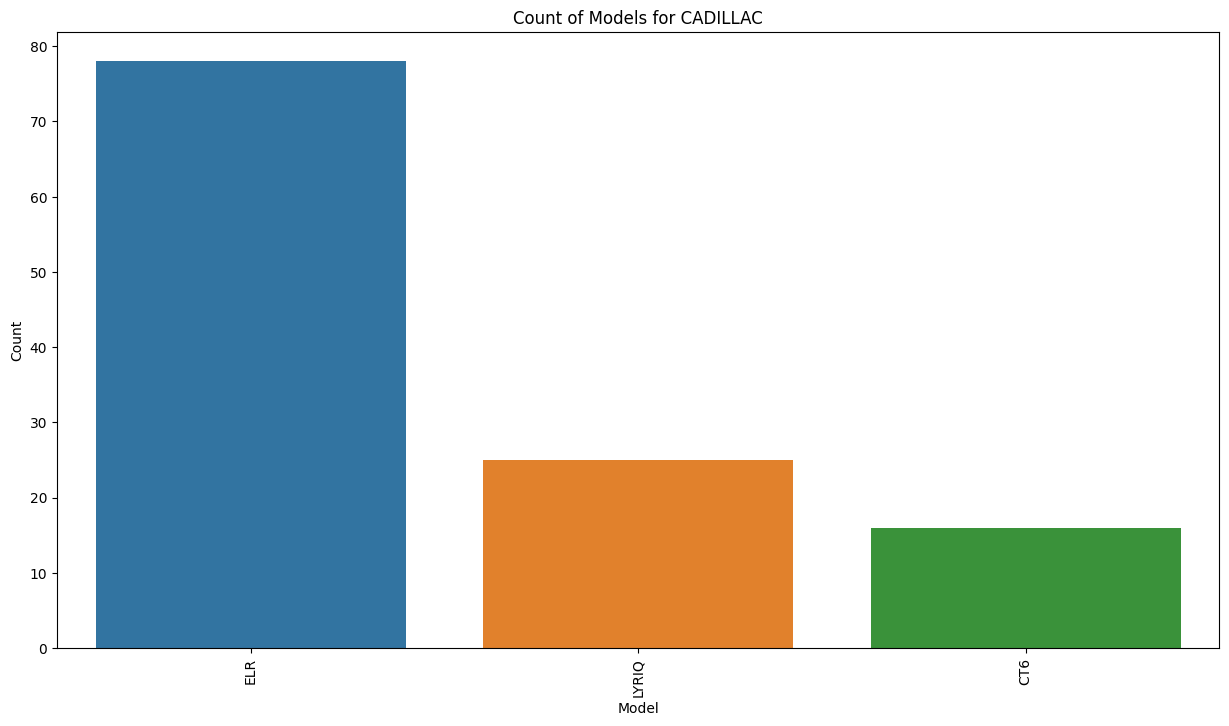

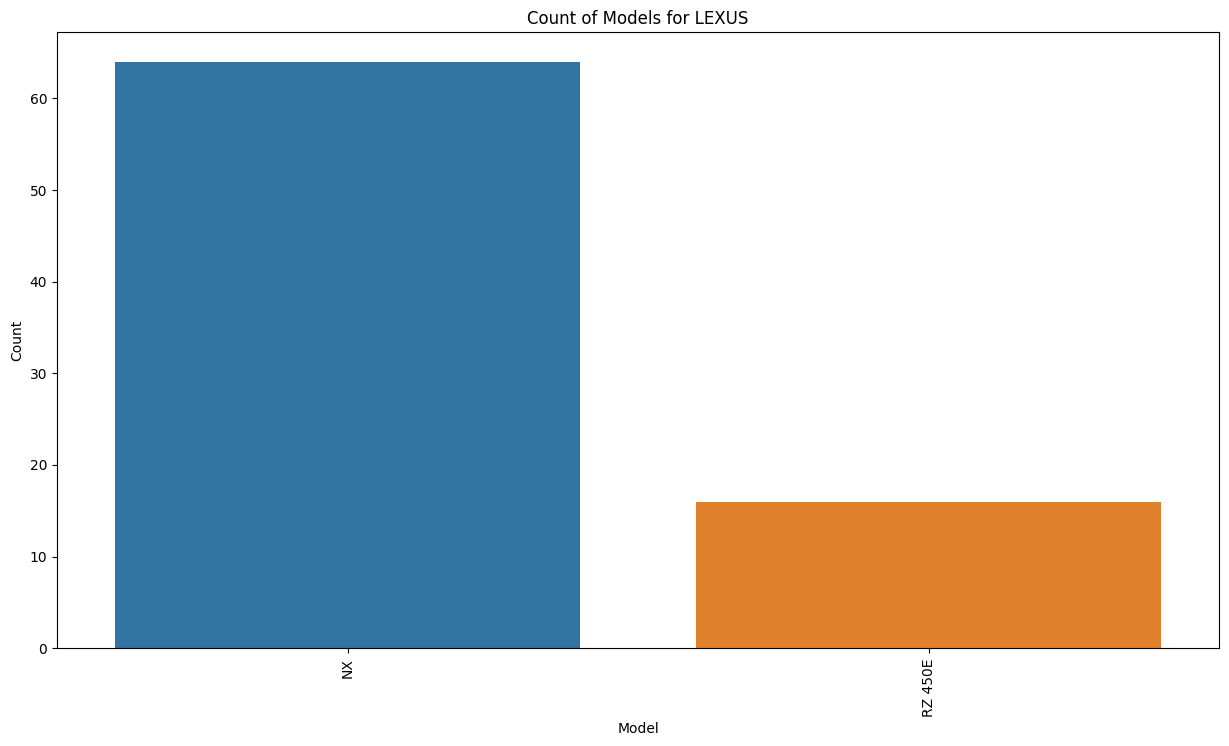

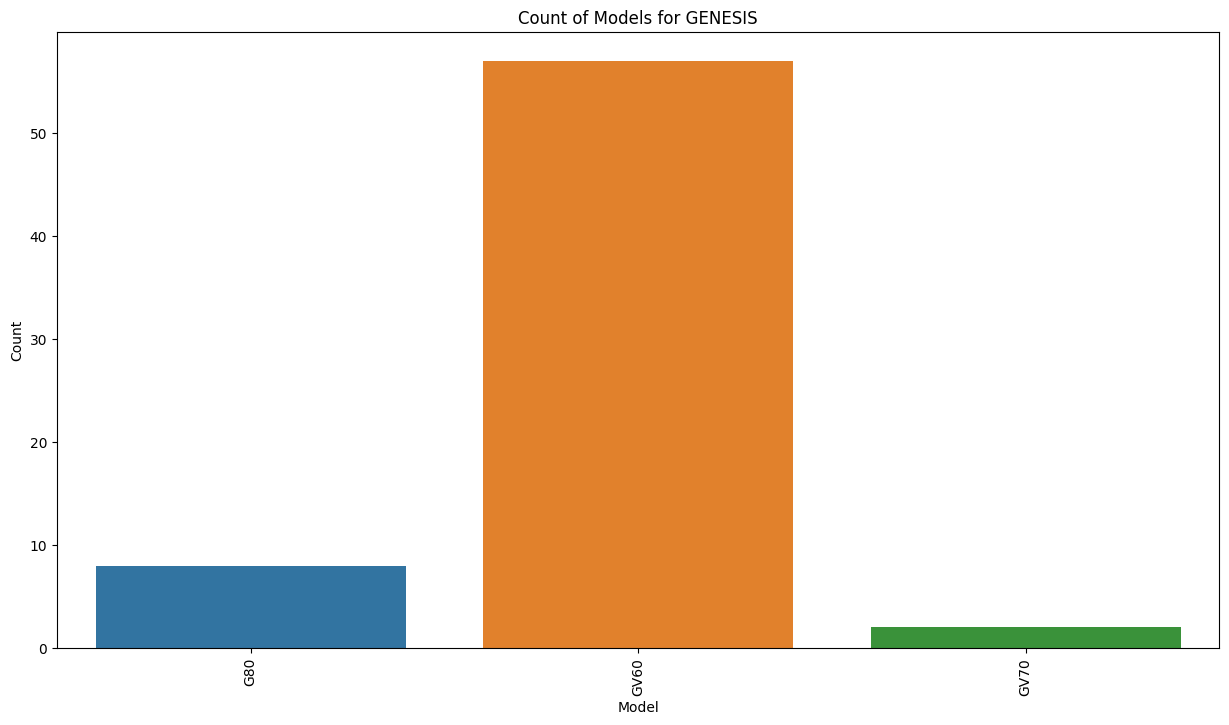

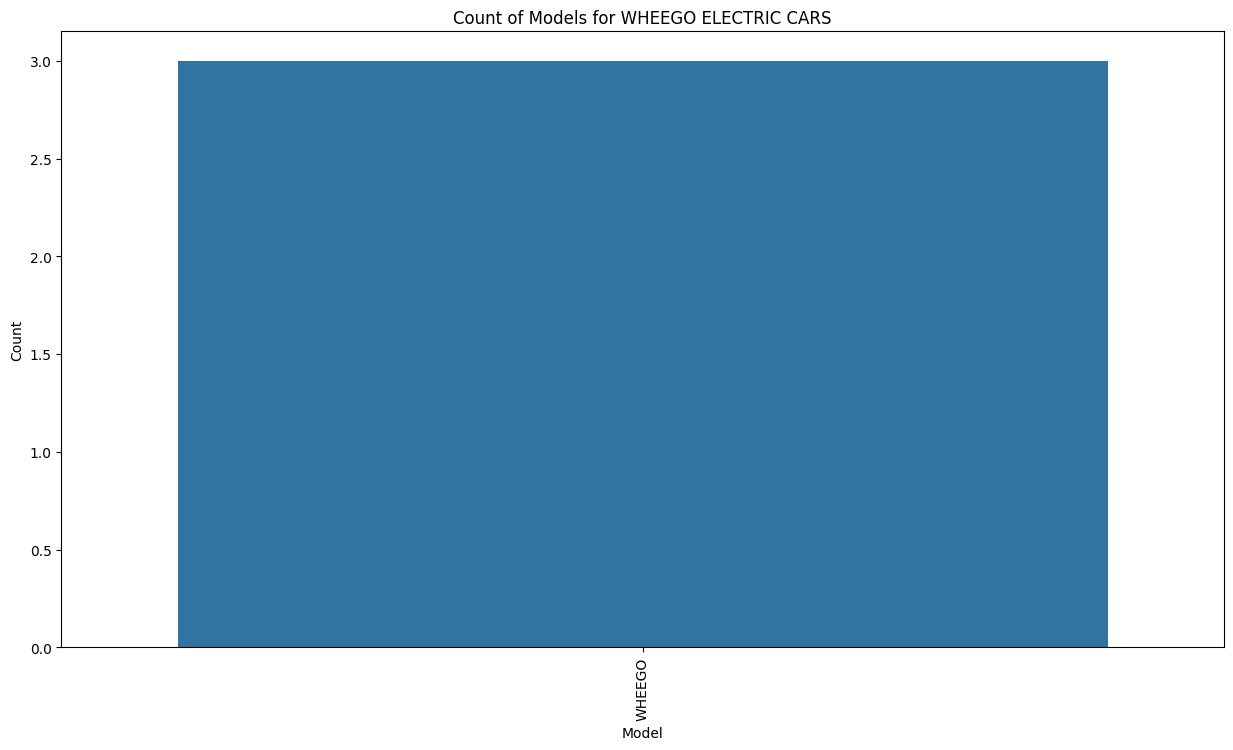

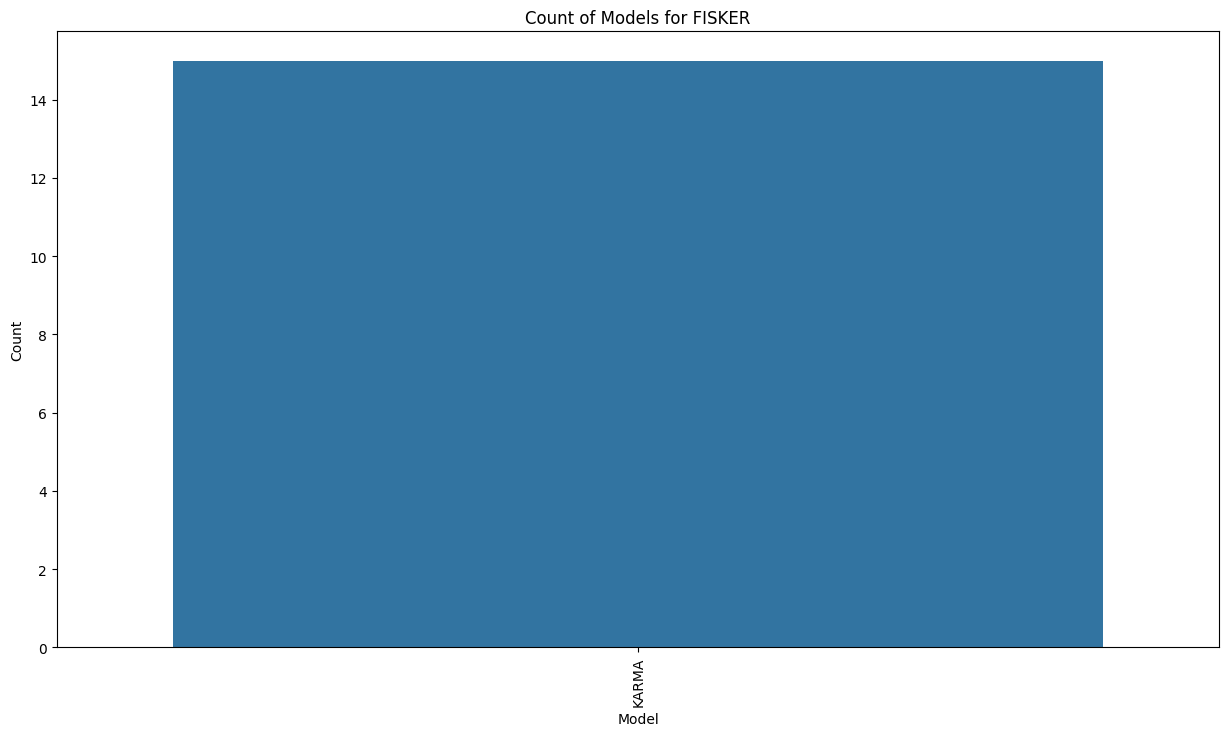

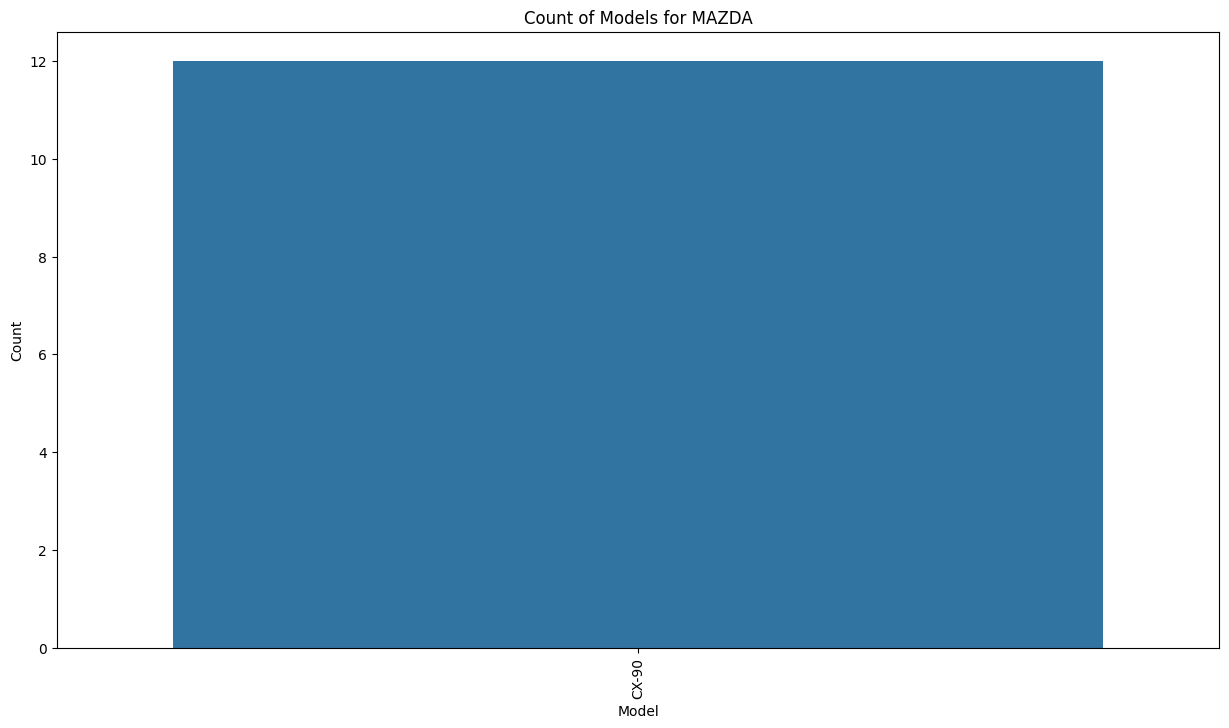

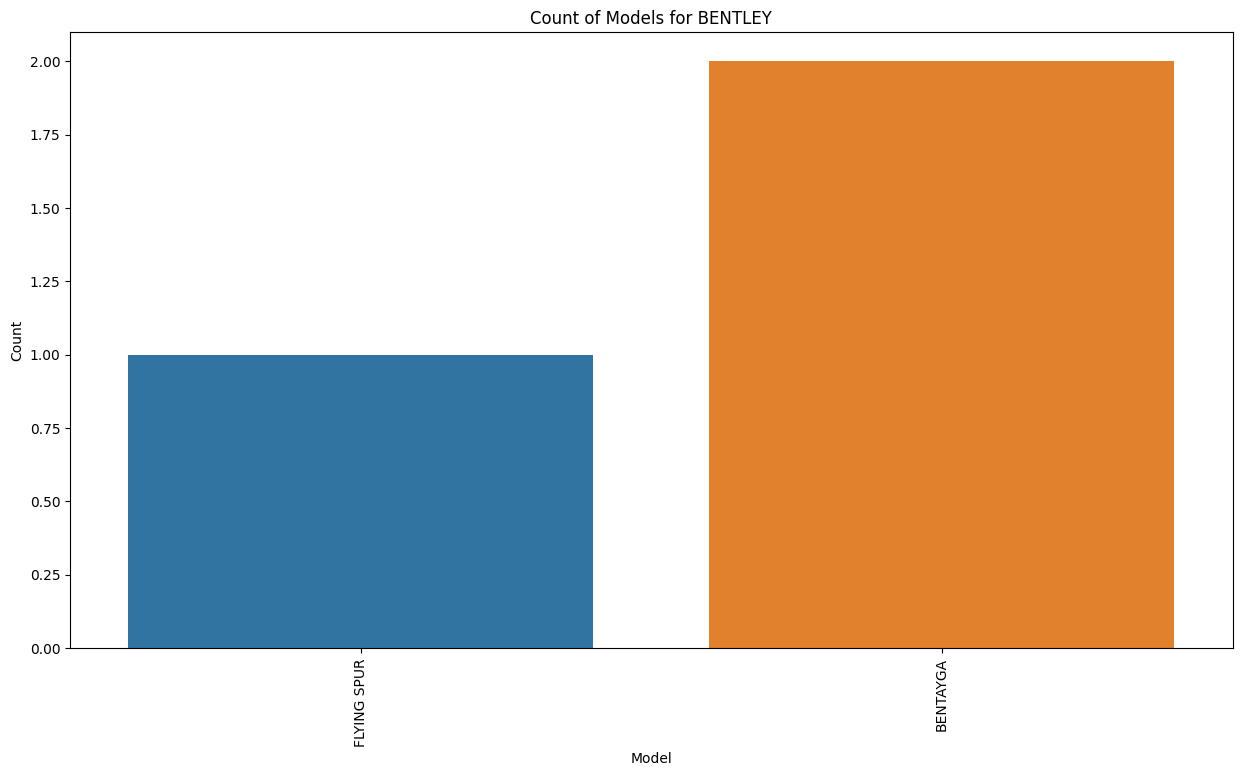

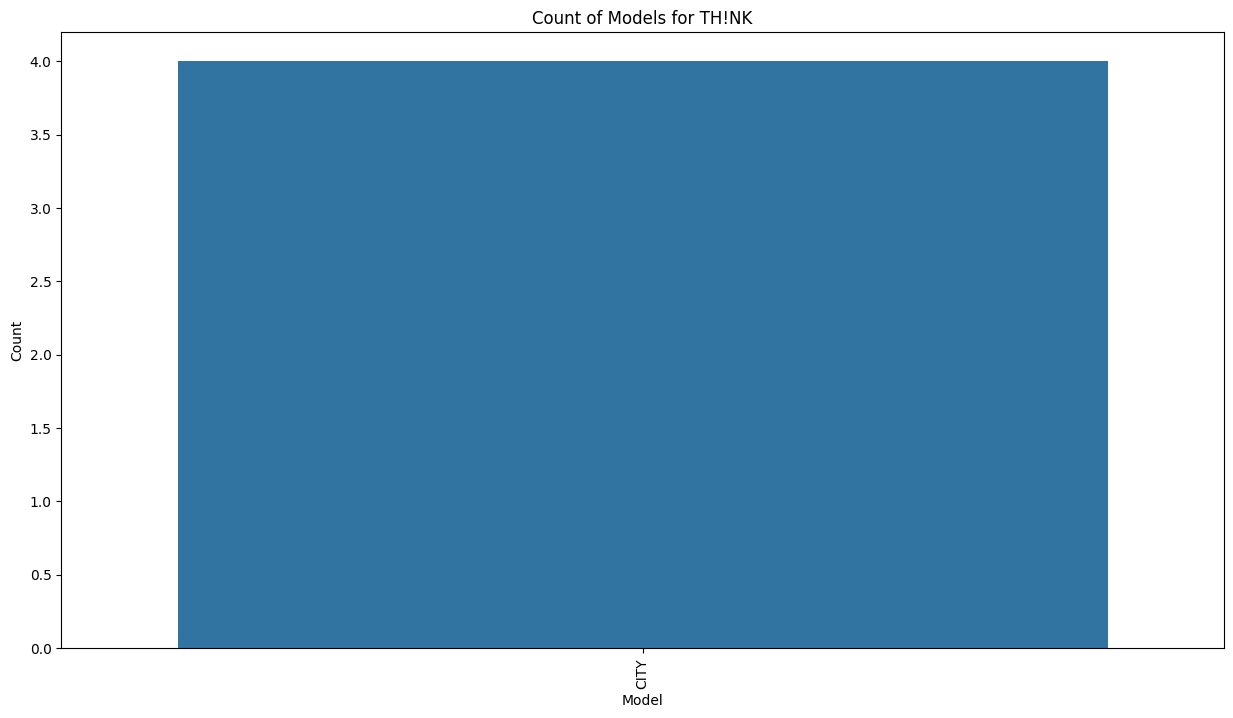

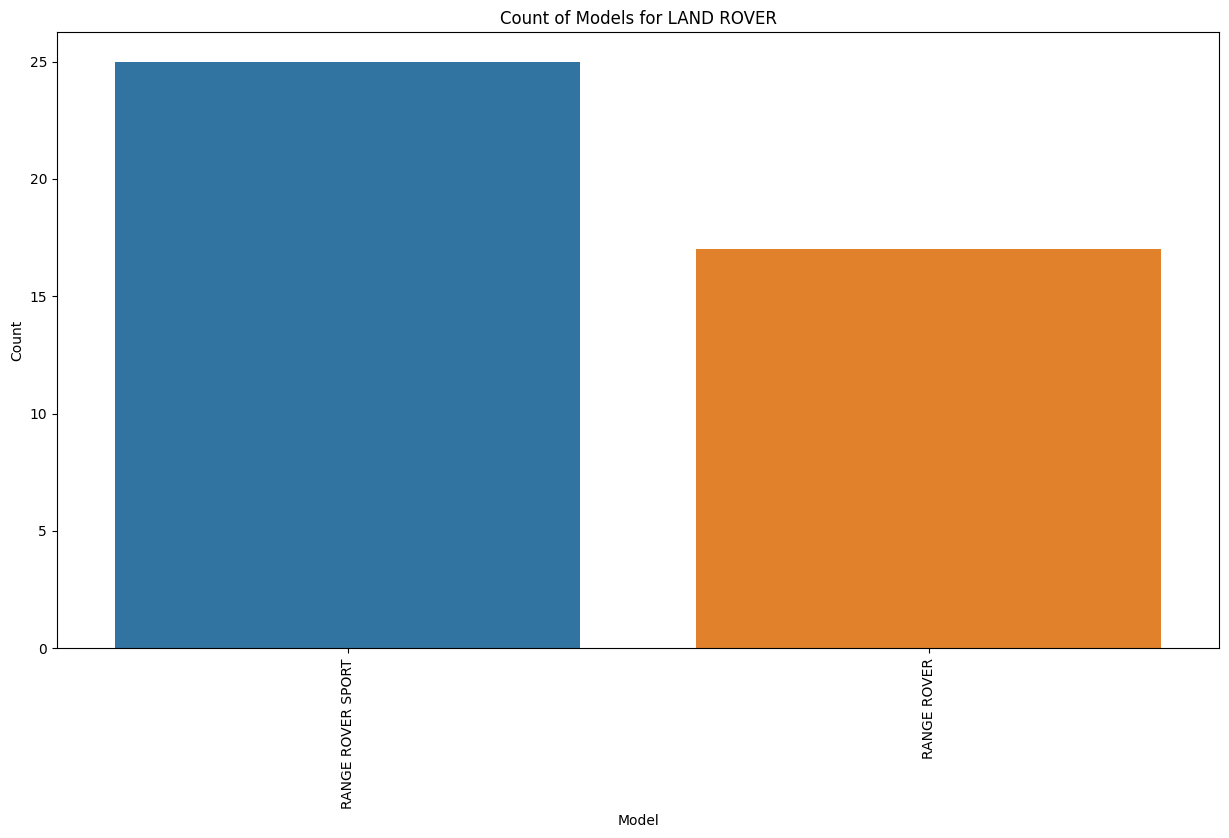

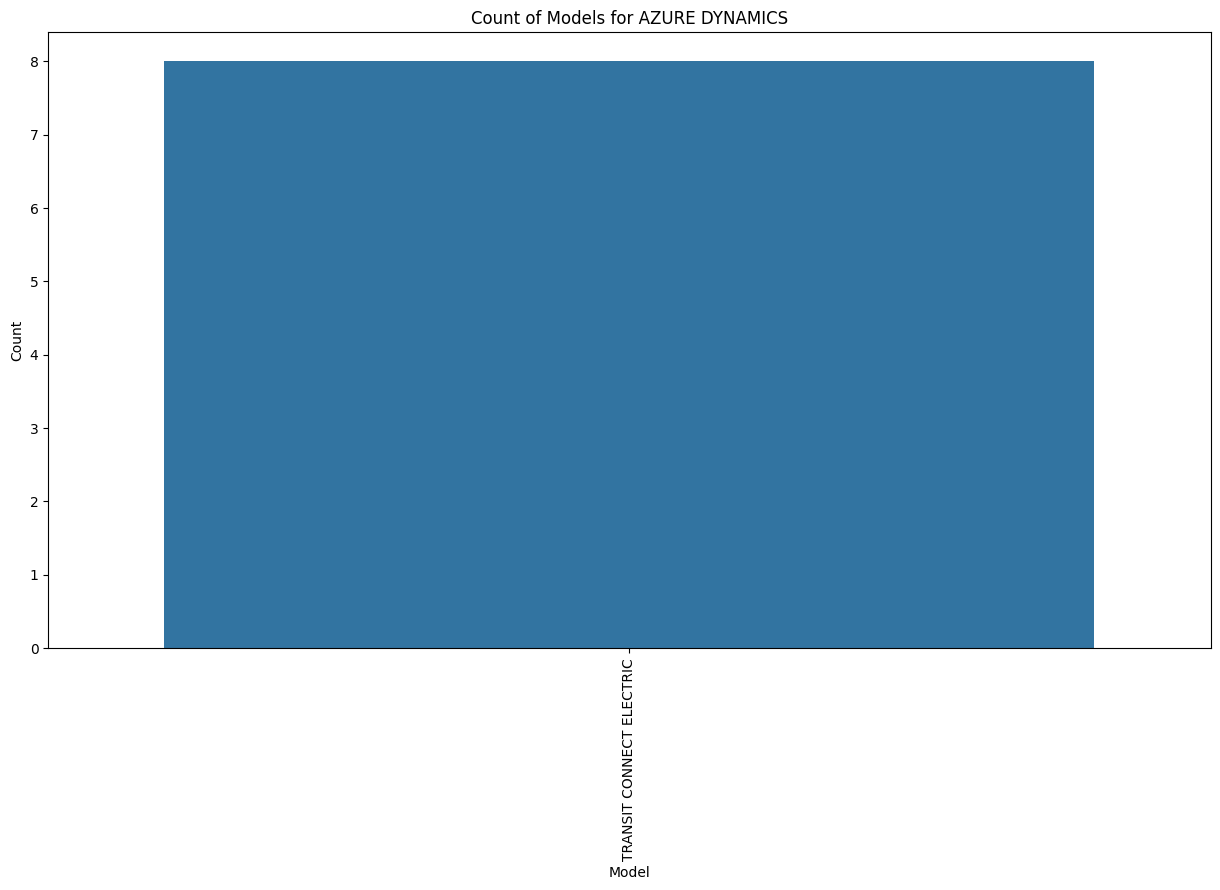

In [78]:

for make in df['Make'].unique():

    make_data = df[df['Make'] == make]

    plt.figure(figsize=(15, 8))
    sns.countplot(data=make_data, x='Model')
    plt.title(f'Count of Models for {make}')
    plt.xlabel('Model')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


In [79]:
df.groupby(['Make','Model',])['Model'].count()

Make                  Model                   
AUDI                  A3                            572
                      A7                             10
                      A8 E                            2
                      E-TRON                        918
                      E-TRON GT                     101
                      E-TRON SPORTBACK              172
                      Q4                            205
                      Q5                            136
                      Q5 E                          579
                      Q8                              1
                      RS E-TRON GT                   24
AZURE DYNAMICS        TRANSIT CONNECT ELECTRIC        8
BENTLEY               BENTAYGA                        2
                      FLYING SPUR                     1
BMW                   330E                          403
                      530E                          383
                      740E                           25
 

In [80]:
df.groupby(['Model Year', 'Make', 'Model'])['Model'].count()

Model Year  Make                  Model                   
1997        CHEVROLET             S-10 PICKUP                    1
1998        FORD                  RANGER                         1
1999        FORD                  RANGER                         4
2000        FORD                  RANGER                         9
2002        TOYOTA                RAV4                           2
2003        TOYOTA                RAV4                           1
2008        TESLA                 ROADSTER                      19
2010        TESLA                 ROADSTER                      20
            WHEEGO ELECTRIC CARS  WHEEGO                         3
2011        AZURE DYNAMICS        TRANSIT CONNECT ELECTRIC       5
            CHEVROLET             VOLT                          75
            NISSAN                LEAF                         724
            TESLA                 ROADSTER                       7
            TH!NK                 CITY                           4
201

Electrical vehicals were started form 1997 by CHEVROLET  make

In [81]:
def get_value_counts(df):
    for column in df.select_dtypes('object'):
        sns.countplot(x=column, data=df)
        plt.xticks(rotation=90)
        plt.show()

In [82]:
#df['Vehicle Location']=df['Vehicle Location'].str.replace("POINT", "").str.replace('(','').str.replace(')','')

In [83]:
df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.strip('POINT ()').str.split(expand=True).astype(float)


In [84]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Longitude,Latitude
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10,-122.913102,47.013593
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10,-122.359364,47.979655
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10,-122.091505,47.915555
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.329815,47.579810
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10,-122.375070,47.808070


In [85]:
from geopy.geocoders import Nominatim
import pandas as pd

# Initialize Nominatim API
geolocator = Nominatim(user_agent="geo_extractor")

# Set the headers to specify English language
geolocator.headers = {"Accept-Language": "en-US,en;q=0.5"}

# Example latitude and longitude values for a single row
latitude = 47.579810
longitude = 122.329815

# Function to extract location details for a single row
def get_location(latitude, longitude):
    location = geolocator.reverse((latitude, longitude))
    address = location.address
    city = location.raw.get("address", {}).get("city", "")
    country = location.raw.get("address", {}).get("country", "")
    return pd.Series({'Address': address, 'City': city, 'Country': country})

# Apply the function to the single row
location_details = get_location(latitude, longitude)

# Create a DataFrame from the extracted location details
result_df = pd.DataFrame(location_details).T

result_df.head()


ModuleNotFoundError: No module named 'geopy'